<a href="https://colab.research.google.com/github/pbrandao26/AnaliseDeDados_MVP_2023/blob/main/MVP_PLN_InstagramNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Introdução e objetivos

---



Neste projeto, exploramos o desenvolvimento de um modelo de redes neurais focado em processamento de linguagem natural (PLN), especificamente treinado para classificar a fonte de notícias publicadas no Instagram a partir de seus textos curtos. A motivação para este trabalho deriva da crescente influência das redes sociais na disseminação de informações e do desafio em identificar fontes confiáveis em meio ao vasto volume de conteúdo disponível. Em uma era marcada pela rapidez na propagação de notícias e pela presença de informações muitas vezes não verificadas, a capacidade de rapidamente classificar e validar a origem de uma notícia torna-se uma ferramenta valiosa para consumidores de informação e plataformas de mídia social.


## 1.1 - Descriçao do problema

O problema abordado é essencialmente um problema de classificação, onde o objetivo é identificar a fonte de uma notícia com base no conteúdo textual publicado. Para abordar esta questão, utilizamos redes neurais, aproveitando sua capacidade de capturar nuances linguísticas e padrões em dados de texto. Além disso, ao final do projeto, comparamos o desempenho deste modelo com outros modelos de machine learning e ensambles, visando explorar diferentes abordagens e identificar a mais eficaz para o problema em questão.

## 1.2 - Premissas e Hipóteses

Algumas premissas importantes norteiam este trabalho: assume-se que o texto curto do Instagram, devido ao seu espaço limitado para expressão, contém características distintivas suficientemente fortes, impressas pela fonte ou pelo redator, que permitem a identificação de padrões únicos para o treinamento de modelos de aprendizado de máquina. Os dados para este estudo foram obtidos por meio de técnicas de webscraping e estão devidamente rotulados com a fonte, facilitando a supervisão do aprendizado.


## 1.3 - Descrição do dataset

Os atributos considerados inicialmente no dataset incluem:

* **URL**: A URL de onde a notícia foi extraída;
- **Texto do Post**: O corpo completo do texto da notícia postada no Instagram;
- **Descrição Resumida**: Uma descrição concisa da notícia, incluindo likes e
comentários;
- **Fonte**: A fonte da notícia;
- **Quantidade de Likes**: Número de curtidas que a notícia recebeu;
- **Quantidade de Comentários**: Número de comentários na publicação;
- **Data de Postagem**: A data em que a notícia foi publicada;
- **Descrição Resumida Simples**: Uma descrição ainda mais condensada da notícia.


## 1.4 - Importações e blocos 'if False:' ao longo do documento

Como o processo para desenvolvimento deste trabalho inclui diversas etapas de treinamento e validação de diversos modelos de Redes Neurais, Machine Learning e Ensambles, bem como o pré-processamento de uma grande quantidade de dados, algumas partes deste documento estarão devidamente indicadas com '`if False:`'. Isso se deve ao fato de serem referentes às etapas custosas e demoradas para o treinamento destes modelos ou o salvamento dos mesmos dentro do Google Drive, além da própria ativação do Google Drive para o armazenamento dos modelos já treinados e dos históricos obtidos durante o treinamento e validação.

Essa abordagem é adotada para não comprometer o tempo do leitor, permitindo a exploração dos resultados sem a necessidade de reexecutar processos longos e intensivos. Portanto, os trechos que envolvem operações demoradas serão indicados com '`if False:`', seguidos por blocos dedicados à importação de tudo aquilo que foi obtido de progresso nos blocos identificados dessa maneira.

Portanto, o leitor não precisa se preocupar ao executar todo o conteúdo deste notebook, haja vista que as etapas mais demoradas serão puladas, de maneira que o conteúdo desenvolvido não seja perdido. Esse método garante que o foco esteja na análise dos resultados e na interpretação dos modelos, sem a necessidade de repetir processos de computação intensiva.



# 2 - Bloco dos "imports"

---



Nesta seção, detalhamos a preparação do ambiente de desenvolvimento necessário para a execução do nosso projeto. Isso inclui a instalação de bibliotecas essenciais, importação de módulos relevantes e o download de recursos críticos para o processamento de linguagem natural e modelagem.



## 2.1 Instalação de Bibliotecas Externas

Primeiramente, instalamos a biblioteca `lime`, que será crucial para interpretar os pesos das palavras na decisão do modelo de redes neurais desenvolvido para classsificar uma fonte. Esse passo é crucial para se obter a nuvem de palavras chave de cada fonte.

In [45]:
!pip install lime

## 2.2 - Importação de Bibliotecas

- **Bibliotecas padrão**:
Importamos um conjunto de bibliotecas padrão necessárias para manipulação de dados, operações em arquivos, expressões regulares, e outras funcionalidades básicas de programação

- **Modelagem de Dados**:
Para a manipulação e análise de dados, utilizamos `pandas` para o manejo de DataFrames e `numpy` para operações numéricas

- **Machine Learning**:
Importamos ferramentas do `scikit-learn` para modelagem, como divisão de dados, validação cruzada, pré-processamento, métricas de avaliação, e vários algoritmos de classificação

- **Desbalanceamento do Dataset**:
Para tratar possíveis desequilíbrios nos dados, utilizamos o `SMOTE` da biblioteca `imblearn`

- **Processamento de Linguagem Natural (PLN)**:
Importamos `nltk` e `spacy` para processamento de texto, além de `gensim` para a utilização do modelo word2vec

- **Deep Learning**:
Utilizamos o `tensorflow.keras` para construir e treinar modelos de redes neurais

- **Visualização de Dados**:
Para visualizar os dados e resultados dos modelos, usamos `matplotlib`, `seaborn`, `plotly` e `wordcloud`

- **Importação de Dados**:
Ferramentas para importação de dados de diversas fontes

- **Ferramentas de Explicação**:
Configuramos o `LimeTextExplainer` para ajudar na interpretação dos pesos nas palavras do modelo de PLN

In [46]:
# Bibliotecas padrão
import itertools
import multiprocessing
import os
import pickle
import re
import unicodedata
import json
from collections import defaultdict

# Modelagem de dados
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, \
                             auc, average_precision_score, precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Desbalanceamento do dataset
from imblearn.over_sampling import SMOTE

# Processamento de Linguagem Natural (PLN)
import nltk
import spacy
from gensim.models import Word2Vec

# Deep Learning
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Importação de dados
import requests
import gdown

# Ferramentas de explicação
from lime.lime_text import LimeTextExplainer


## 2.3 - Download de Recursos de PLN
Para garantir que todas as funcionalidades de PLN estejam prontamente disponíveis, fazemos o download dos recursos necessários do `nltk` e `spacy`.


- **NLTK Stopwords**:

Stopwords são palavras que geralmente são removidas nos dados de texto antes de realizar a análise, pois são palavras comuns que não contribuem significativamente para o significado dos textos, como "e", "o", "a", entre outras. A biblioteca NLTK (Natural Language Toolkit) fornece uma lista compreensiva de stopwords em várias línguas, que ajudam na limpeza e na pré-processamento de dados de texto para análises de PLN.

- **Modelo de Linguagem do SpaCy**:

SpaCy é uma biblioteca avançada para PLN que facilita tarefas como a tokenização, a lematização, e a extração de entidades nomeadas, entre outras. `pt_core_news_lg` é um modelo de linguagem grande para o português, treinado em uma variedade de textos do mundo real e notícias. Este modelo inclui dados binários como vocabulário, vetores e configurações específicas de sintaxe que são essenciais para processar texto na língua portuguesa com eficácia.


- **Carregamento do Modelo SpaCy**:

Esta linha de código carrega o modelo `pt_core_news_lg` que foi baixado anteriormente. O objeto `nlp` criado é usado para processar texto, aplicando todas as capacidades do modelo SpaCy, como análise sintática, reconhecimento de entidades nomeadas e outros. Isso permite que o texto seja dividido em tokens, analisado e interpretado de forma que as características linguísticas possam ser extraídas e utilizadas em tarefas de PLN.


In [47]:
nltk.download('stopwords')
spacy.cli.download("pt_core_news_lg")
nlp = spacy.load('pt_core_news_lg')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


- **Montagem do Google Drive**:

Este bloco de código foi crucial durante a fase de treinamento e validação dos modelos. Ele é encapsulado dentro de um `if False:` para evitar sua execução automática e desnecessária durante a leitura ou revisão do notebook. A montagem do Google Drive é utilizada para salvar de forma segura os modelos treinados, os históricos de treinamento e quaisquer outros recursos importantes gerados durante a execução do projeto.

In [48]:
if False:
  # Configurar meu drive para salvamento dos recursos
  from google.colab import drive
  drive.mount('/content/drive')

# 3 - Bloco das funções

---

Este bloco inclui as funções essenciais para o processamento e análise dos dados neste projeto. Cada função desempenha um papel específico no manejo do texto, desde a preparação até a classificação final.




## 3.1 - Função `predict_random_news`

Esta função aplica todo o processo de pré-processamento a um único texto, que é o mesmo aplicado a um conjunto de dados completo pela função `preprocess_text`. Ela prepara o texto para ser usado em um modelo de classificação e retorna a previsão de qual fonte gerou aquele texto. As etapas de pré-processamento incluem a remoção de emojis, normalização do texto, tokenização e lematização, e vetorização usando um modelo Word2Vec. A previsão resultante é interpretada para retornar a fonte mais provável:
- **Interpretação de Resultados**: A função converte a saída do modelo, que geralmente vem em forma de probabilidades, para uma etiqueta de classe legível usando o `label_encoder`.


## 3.2 - Função `preprocess_text`
Esta função realiza uma série de operações detalhadas de pré-processamento em um DataFrame contendo textos, preparando-os para o treinamento de modelos de aprendizado. As etapas consistem em:

- **Remoção de Emojis**: Utiliza uma expressão regular para identificar e eliminar emojis dos textos, pois eles podem introduzir ruídos e não são úteis para a análise de texto.

- **Normalização de Texto**: Transforma todo o texto para uma forma sem acentos e em minúsculas para garantir consistência e evitar problemas de case sensitivity.

- **Limpeza de Texto**: Remove caracteres especiais e informações prévias como nomes de fontes, o que ajuda a reduzir a complexidade e focar no conteúdo essencial.

- **Tokenização e Lematização**: Utiliza o `SpaCy` para quebrar o texto em tokens (palavras), convertendo-as para suas formas base ou lemas, enquanto remove stopwords e pontuações. Isso ajuda a focar nas palavras que realmente carregam significado.

- **Inclusão de Bigramas**: Adiciona bigramas ao conjunto de tokens para capturar relações significativas entre palavras adjacentes, o que se mostrou crucial para entender contextos específicos.

- **Limpeza Final**: Elimina espaços extras e tokens vazios para finalizar o pré-processamento.

- **Adição ao DataFrame**: Os tokens processados são adicionados de volta ao DataFrame original em uma nova coluna, enriquecendo os dados para etapas subsequentes de análise e modelagem.


## 3.3 - Função `vectorize_text`
Esta função converte tokens pré-processados em uma representação vetorial:

- **Seleção de Palavras e Vetorização**: Filtra as palavras usando o modelo Word2Vec e calcula a média dos vetores correspondentes, gerando um vetor único que representa todo o texto.
*Texto em itálico*
- **Tratamento de Exceções**: Se não houver correspondências no modelo, retorna um vetor de zeros para manter a consistência da saída.


In [49]:
def predict_random_news(texto, modelo, word2vec_model, label_encoder):
    # Compilar regex para remoção de emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
                               u"\U0001F680-\U0001F6FF"  # transporte & símbolos de mapa
                               u"\U0001F700-\U0001F77F"  # alquímicos símbolos
                               u"\U0001F780-\U0001F7FF"  # Geométrico formas estendidas
                               u"\U0001F800-\U0001F8FF"  # Símbolos suplementares e pictogramas
                               u"\U0001F900-\U0001F9FF"  # Símbolos e Pictogramas suplementares
                               u"\U0001FA00-\U0001FA6F"  # Símbolos de xadrez
                               u"\U0001FA70-\U0001FAFF"  # Símbolos e pictogramas estendidos-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

    # Remover emojis
    text = emoji_pattern.sub('', texto)

    # Normalizar texto para remover acentos e converter para minúsculas
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII').lower()

    # Remover tudo antes do primeiro ":", incluindo o próprio ":"
    text = re.sub(r'^.*?:', '', text)

    # Remover caracteres especiais
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Processar texto com spaCy
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

    # Incluir bigramas
    bigrams = ['_'.join([doc[i].lemma_.lower(), doc[i+1].lemma_.lower()]) for i in range(len(doc)-1) if not (doc[i].is_stop or doc[i+1].is_stop)]
    tokens.extend(bigrams)

    # Remover espaços em branco extras e tokens vazios
    tokens = [token.strip() for token in tokens if token.strip()]

    # Vetorizar o texto usando a função fornecida
    vector = vectorize_text(tokens, word2vec_model).reshape(1, -1)
    # Prever usando o modelo
    y_pred = model.predict(vector)

    # Para redes neurais, onde predict retorna probabilidades:
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    # Converter as previsões de volta para rótulos
    predicted_label = label_encoder.inverse_transform(y_pred)[0]
    print(f"Provável fonte: {predicted_label}")


def preprocess_text(df):
    # Compilar regex para remoção de emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
                               u"\U0001F680-\U0001F6FF"  # transporte & símbolos de mapa
                               u"\U0001F700-\U0001F77F"  # alquímicos símbolos
                               u"\U0001F780-\U0001F7FF"  # Geométrico formas estendidas
                               u"\U0001F800-\U0001F8FF"  # Símbolos suplementares e pictogramas
                               u"\U0001F900-\U0001F9FF"  # Símbolos e Pictogramas suplementares
                               u"\U0001FA00-\U0001FA6F"  # Símbolos de xadrez
                               u"\U0001FA70-\U0001FAFF"  # Símbolos e pictogramas estendidos-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

    processed_titles = []
    for _, row in df.iterrows():
        text = row['title'] if 'title' in row and row['title'] is not None else ""
        source = row['source'] if 'source' in row and row['source'] is not None else ""

        # Remover emojis
        text = emoji_pattern.sub('', text)

        # Normalizar texto para remover acentos e converter para minúsculas
        text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII').lower()
        # Remover tudo antes do primeiro ":", incluindo o próprio ":"
        text = re.sub(r'^.*?:', '', text)
        # Remover o nome da fonte e tratar outros padrões comuns
        text = text.replace(source.lower(), '').strip()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Removendo caracteres especiais

        # Processar texto com spaCy
        doc = nlp(text)
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

        # Incluir bigramas
        bigrams = ['_'.join([doc[i].lemma_.lower(), doc[i+1].lemma_.lower()]) for i in range(len(doc)-1) if not (doc[i].is_stop or doc[i+1].is_stop)]
        tokens.extend(bigrams)

        # Remover espaços em branco extras e tokens vazios
        tokens = [token.strip() for token in tokens if token.strip()]

        processed_titles.append(tokens)

    # Adicionar a coluna processada ao DataFrame
    df['processed_title'] = processed_titles


# Função para vetorizar um texto usando o modelo Word2Vec treinado
def vectorize_text(text, word2vec_model):
    words = [word for word in text if word in word2vec_model.wv.key_to_index]
    if words:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.zeros(300)

# 4 - Carregamento e fonte do dataset
---

O dataset utilizado neste projeto foi construído através de um script de WebScraping desenvolvido em Python. O objetivo do script era coletar dados de 21 fontes brasileiras de notícias extremamente relevantes. Apenas publicações padrões de fotos no feed do Instagram foram consideradas, excluindo-se Reels e outros tipos de conteúdo.

#### Processo de Coleta:
O script executava um número definido de "scrolls" nas páginas do Instagram das fontes selecionadas, a fim de capturar a maior quantidade de dados possível. Cada "scroll" permitia ao script acessar e salvar mais posts à medida que a página carregava conteúdo adicional.

#### Dados Coletados:
Os dados coletados incluíam principalmente o texto contido em cada publicação. Apesar de este MVP não focar na construção de um dataset, o código utilizado para o webscraping está disponível no mesmo [diretório do GitHub](https://github.com/pbrandao26/ML_Advanced_Analytics_MVP_2024/tree/main/WebScraping_Instagram) que hospeda este notebook, permitindo a revisão e uso por interessados.






## 4.1 - Fontes do Dataset:
As 21 fontes de notícias escolhidas para compor o dataset são:

- Infomoney
- Estadão
- Valor Econômico
- O Globo
- CNN Brasil
- Valor Investe
- BBC Brasil
- Folha de S.Paulo
- G1
- UOL Notícias
- Exame
- El País Brasil
- Revista Oeste
- Carta Capital
- Agência Brasil
- The Compass Brasil
- SBT News
- Jovem Pan News
- Revista Época
- Revista IstoÉ
- Band News TV

#### Carregamento dos Dados:
Para carregar os dados diretamente no notebook, utilizamos o seguinte código, que acessa o arquivo CSV disponibilizado através de uma URL no GitHub, e então lemos csv utilizando o `pandas`.

* **Configurações de exibição**: Com `pd.set_option`, são ajustadas as configurações de exibição do Pandas para permitir a visualização completa das colunas e otimizar a largura de exibição no output. Isso garante que todas as informações relevantes sejam visíveis quando os DataFrames são impressos na tela, facilitando a análise e o debug dos dados carregados.


In [50]:
# URL do arquivo raw no GitHub
url = "https://raw.githubusercontent.com/pbrandao26/ML_Advanced_Analytics_MVP_2024/main/instagram_news.csv"

# Lê o arquivo CSV
df_insta_news = pd.read_csv(url)

# Ajsutando exibição para os prints
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

#5 - Análise exploratória dos dados e pré-processamento

---
Nesta etapa, realizamos uma série de análises e visualizações para entender melhor a natureza dos dados coletados e prepará-los para a modelagem. Abaixo, detalhamos cada passo do processo:



## 5.1 - Análise exploratória

### 5.1.1 - Visualização Inicial dos Dados
Primeiro, exibimos as primeiras e últimas linhas do dataset para obter uma visão geral da estrutura dos dados e do conteúdo das colunas:

In [51]:
# Exibe as primeiras e últimas linhas do dataset
print(df_insta_news.head(15))
print(df_insta_news.tail(15))

                                         url                                              title                                        description     source  likes  comments        date                                  short_description
0   https://www.instagram.com/p/C5qZWDNuPsS/   InfoMoney no Instagram: "❗ O Ministério da Ju...  12K likes, 2,745 comments -  infomoneyApril 12...  infomoney  12000      2745  12/04/2024  ❗ O Ministério da Justiça e Segurança Pública ...
1   https://www.instagram.com/p/C4F3wi5OJP-/   InfoMoney no Instagram: "💰 A maior criptomoed...  15K likes, 212 comments -  infomoneyMarch 4, 2...  infomoney  15000       212   4/03/2024  💰 A maior criptomoeda do mercado subiu pelo se...
2   https://www.instagram.com/p/C35ag6KOcd5/   InfoMoney no Instagram: "📱 Após seis meses de...  3,310 likes, 19 comments -  infomoneyFebruary ...  infomoney   3310        19  28/02/2024  📱 Após seis meses de testes, a versão digital ...
3   https://www.instagram.com/p/C4p6mxGukd-/   I

Ao exibir as primeiras e últimas linhas do dataset, observamos algumas características importantes que justificam as etapas subsequentes de pré-processamento:

- **Quantidade de Notícias**: O dataset contém um total de 11.029 notícias, cada uma representada por uma linha no arquivo CSV.
- **Presença de Emojis**: Muitas notícias incluem emojis em seus títulos, o que pode interferir na análise textual devido ao seu conteúdo não textual.
- **Formatação do Título**: Há uma regularidade no formato dos títulos, onde cada um começa com o nome da fonte seguido de "no Instagram:". Esse padrão é importante para entender a estrutura dos dados e necessita de remoção durante o pré-processamento para garantir que os modelos de análise se concentrem apenas no conteúdo relevante da notícia.

Essas observações indicam a necessidade de uma limpeza detalhada nos dados, incluindo a remoção de emojis e a padronização dos títulos, para melhorar a qualidade dos dados para análises futuras.


### 5.1.2 - Verificação de Valores Faltantes
Identificamos e quantificamos quaisquer valores faltantes no dataset para entender a completude dos dados:

In [52]:

# Verificando valores faltantes
missing_values = df_insta_news.isnull().sum()
print("Valores nulos por coluna:")
print(missing_values)

# Verificando strings vazias
empty_strings = (df_insta_news == '').sum()
print("Strings vazias por coluna:")
print(empty_strings)

Valores nulos por coluna:
url                  0
title                0
description          0
source               0
likes                0
comments             0
date                 0
short_description    0
dtype: int64
Strings vazias por coluna:
url                  0
title                0
description          0
source               0
likes                0
comments             0
date                 0
short_description    0
dtype: int64


Na etapa de verificação de valores faltantes e strings vazias, constatamos que o dataset está em estado de integridade:

- **Valores Nulos**: A análise mostrou que não existem valores nulos em nenhuma das colunas do dataset.
- **Strings Vazias**: Da mesma forma, a verificação revelou que não há strings vazias nos campos de dados.


### 5.1.3 - Sumário Estatístico das Variáveis Numéricas
Geramos um sumário estatístico para as variáveis numéricas 'likes' e 'comments' para analisar distribuições como média, mediana, máximo e mínimo:

In [53]:
# Sumário estatístico para variáveis numéricas
numerical_summary = df_insta_news[['likes', 'comments']].describe()
print(numerical_summary)

               likes      comments
count   11030.000000  11030.000000
mean     8564.993744    580.529556
std     15615.516555   1369.100068
min         0.000000      0.000000
25%       426.000000     19.000000
50%      2651.000000    115.000000
75%     10000.000000    510.750000
max    289000.000000  29000.000000


O sumário estatístico das variáveis `likes` e `comments` oferece uma visão geral da distribuição dessas métricas no dataset e não tem nenhum fator relevante a se destacar.


### 5.1.4 - Contagem e Distribuição de Fontes
Avaliamos quantas postagens foram feitas por cada fonte de notícias para verificar o balanceamento das classes:

In [54]:
# Contagem de fontes únicas
source_counts = df_insta_news['source'].value_counts()

# Plotando a distribuição de fontes para o balanceamento das classes
plt.figure(figsize=(12, 8))
sns.barplot(y=source_counts.values, x=source_counts.index, color='blue')
plt.title('Distribuição de Fontes no Dataset')
plt.ylabel('Número de Posts')
plt.xlabel('Fontes')
plt.xticks(rotation=90)  # Rotação dos labels no eixo x para melhor visualização
plt.show()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

A distribuição das fontes no dataset revelou um desbalanceamento significativo entre as classes, onde algumas fontes são muito mais representadas do que outras. Este desbalanceamento pode introduzir viés nos modelos de aprendizado, pois eles podem se tornar tendenciosos para as classes mais frequentes.

A análise indica que o desbalanceamento observado pode estar associado à diferença na quantidade de Reels postados pelas fontes. Durante a fase de coleta de dados, cada uma das 21 fontes recebeu a mesma quantidade de "scrolls" no Instagram. No entanto, fontes como a Revista Época, que aparece com maior quantidade de notícias, podem estar postando menos Reels em comparação a outras fontes. Por outro lado, o Portal G1, que tem menor representação no dataset, pode estar entre os maiores postadores de Reels. Essa tendência de postagem pode explicar por que algumas fontes têm menos posts de notícias padrão disponíveis para raspagem.

Sem tratamento, esse desbalanceamento pode afetar negativamente a capacidade dos modelos de generalizar adequadamente, especialmente para fontes menos representadas. Para mitigar esse problema e melhorar a robustez dos modelos, planejamos utilizar a técnica `SMOTE` (Synthetic Minority Over-sampling Technique) na etapa de pré-processamento dos dados. `SMOTE` ajudará a criar um equilíbrio artificial, aumentando as instâncias das classes minoritárias através da geração sintética de exemplos novos.

Este plano de ação é essencial para garantir que cada classe seja justamente representada, permitindo que os modelos aprendam a distinguir efetivamente entre as diferentes fontes de notícias sem um viés indesejado.




### 5.1.5 - Análise da Relação entre Likes e Comentários
Criamos um gráfico de dispersão para explorar a relação entre 'likes' e 'comments' em função das diferentes fontes, o que pode indicar padrões de engajamento:


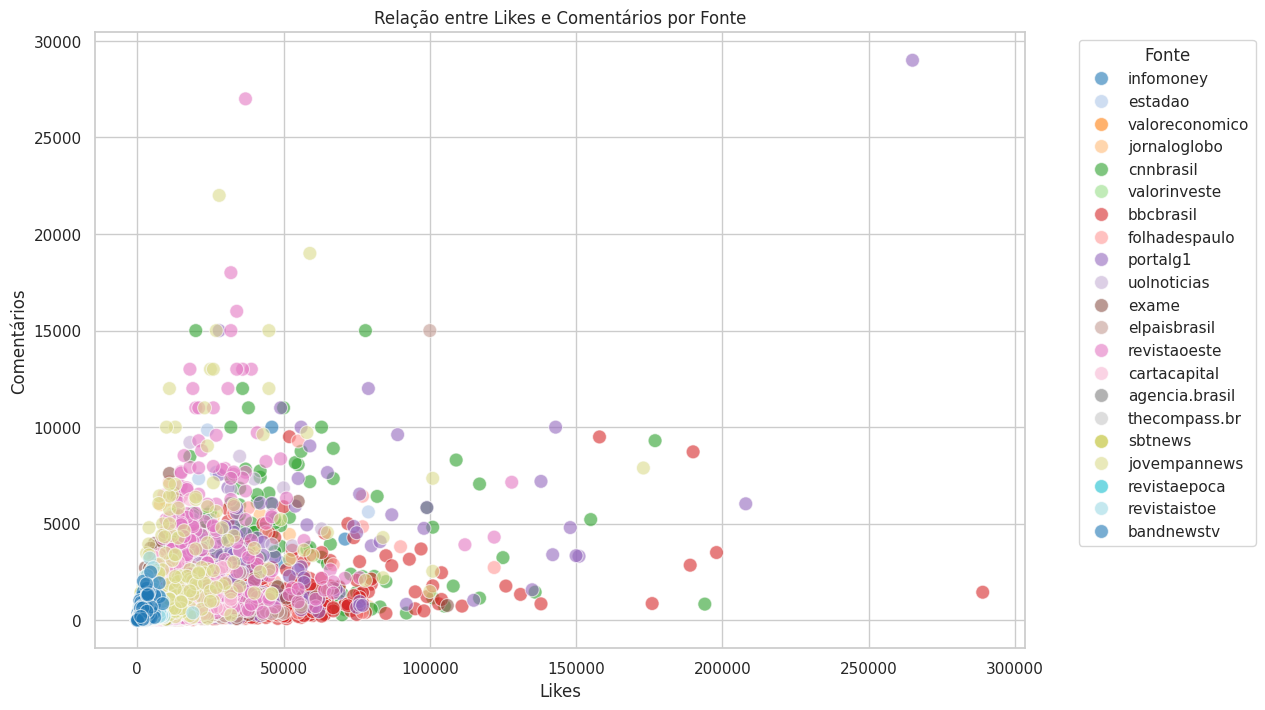

In [55]:
# Configura o estilo do gráfico
sns.set(style="whitegrid")
# Cria um gráfico de dispersão com cores baseadas na fonte das notícias
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='likes', y='comments', hue='source', data=df_insta_news, palette='tab20', s=100, alpha=0.6)
# Adiciona título e rótulos aos eixos
plt.title('Relação entre Likes e Comentários por Fonte')
plt.xlabel('Likes')
plt.ylabel('Comentários')
# Melhora a legenda (ajusta para fora do gráfico)
plt.legend(title='Fonte', bbox_to_anchor=(1.05, 1), loc='upper left')
# Mostra o gráfico
plt.show()


Observando o gráfico de dispersão, podemos notar algumas tendências gerais sobre a relação entre likes e comentários nas postagens das diferentes fontes:

Há uma tendência de que postagens com muitos likes não necessariamente têm um número alto de comentários, indicando que o engajamento do público pode ser mais passivo (like) do que ativo (comentar).

Alguns pontos destacam-se com um número excepcionalmente alto de likes e/ou comentários, possivelmente representando postagens virais ou de grande impacto.
A distribuição de likes e comentários varia consideravelmente entre as fontes. Algumas fontes tendem a ter postagens com um número maior de likes, enquanto outras apresentam uma quantidade maior de comentários.


### 5.1.6 - Distribuição do Comprimento do Texto
Investigamos a distribuição do comprimento dos textos para entender melhor a verbosidade das postagens:

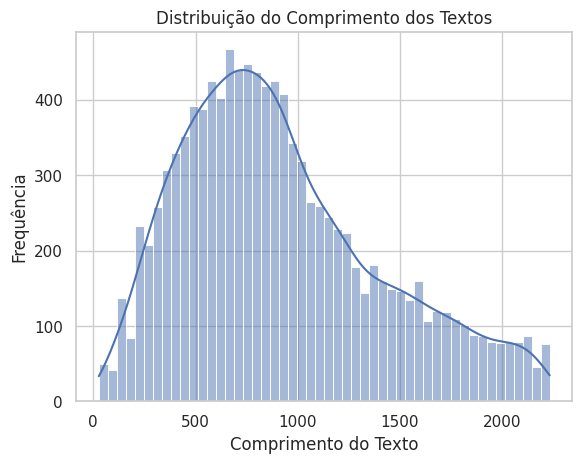

In [56]:

# Distribuição do comprimento do texto
df_insta_news['text_length'] = df_insta_news['title'].apply(len)
sns.histplot(df_insta_news['text_length'], bins=50, kde=True)
plt.title('Distribuição do Comprimento dos Textos')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')
plt.show()

# Configura o estilo do gráfico (opcional)
sns.set(style="whitegrid")
# Cria o boxplot para a coluna 'text_length' que foi adicionada ao DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_insta_news['text_length'])
plt.title('Boxplot do Comprimento dos Títulos das Notícias')
plt.xlabel('Comprimento do Título')
plt.show()

Observando o histograma de distribuição do comprimento dos textos, nota-se que a frequência de postagens aumenta rapidamente com o comprimento do texto, alcançando um pico próximo a 800 caracteres. Esse comportamento sugere que a maioria das notícias tende a ter uma extensão em torno dessa média visualmente estimada.

* Investigação de Textos Curtos

Para aprofundar nossa compreensão dos dados, uma investigação nos textos mais curtos se faz necessária. É importante examinar se estes contêm informações relevantes ou se são em grande parte preenchidos com informações genéricas ou de pouco valor analítico. Uma quantidade significativa de textos curtos pode impactar a modelagem, especialmente se estes não carregarem conteúdo suficiente para a classificação pelas redes neurais.

* Boxplot do Comprimento dos Títulos das Notícias

A análise do boxplot revela que a distribuição dos comprimentos dos títulos das notícias possui alguns outliers, que são títulos com um comprimento bastante elevado. Esses casos extremos podem ser exemplos de notícias com informações adicionais ou contextos mais detalhados, que podem ser tanto benéficos quanto prejudiciais, dependendo do foco da modelagem.

### 5.1.7 - Filtragem por Comprimento de Texto
Definimos um critério de comprimento mínimo para os textos e filtramos o dataset para remover postagens com textos muito curtos.

In [57]:
# Calculando e exibindo os percentis de comprimento do texto
percentiles = df_insta_news['text_length'].quantile([0.1, 0.25, 0.5, 0.75, 0.9]).to_dict()
print(f"Percentis de comprimento dos títulos: {percentiles}")

# Exibindo os títulos mais curtos
short_titles = df_insta_news[df_insta_news['text_length'] < 300]

print(df_insta_news[['title', 'text_length']])

# Filtra o DataFrame para remover títulos com comprimento inferior a 300 caracteres
min_length = 300
df_filtered = df_insta_news[df_insta_news['text_length'] >= min_length]

# Informações sobre o dataset antes e depois da filtragem
print(f"Original: {df_insta_news.shape[0]} postagens")
print(f"Filtrado: {df_filtered.shape[0]} postagens")


Percentis de comprimento dos títulos: {0.1: 349.9000000000001, 0.25: 554.0, 0.5: 832.0, 0.75: 1210.0, 0.9: 1674.0}
                                                   title  text_length
0       InfoMoney no Instagram: "❗ O Ministério da Ju...          845
1       InfoMoney no Instagram: "💰 A maior criptomoed...          388
2       InfoMoney no Instagram: "📱 Após seis meses de...          413
3       InfoMoney no Instagram: "🇷🇺 Vladimir Putin ga...          452
4       InfoMoney no Instagram: "💬 De acordo com duas...          723
...                                                  ...          ...
11025   BandNews TV no Instagram: "Os governadores Ro...          883
11026   BandNews TV no Instagram: "#Urgente 🚨 | #Urge...          605
11027   BandNews TV no Instagram: "Celebrando a força...          327
11028   BandNews TV no Instagram: "A Austrália planej...         1086
11029   BandNews TV no Instagram: "💍❌ O número de #di...          775

[11030 rows x 2 columns]
Original: 11030 pos

Utilizamos percentis estatísticos para estabelecer um limiar de corte para o comprimento dos textos no nosso dataset. Percentis são medidas que indicam o valor abaixo do qual uma determinada porcentagem de observações em um grupo de observações cai. Por exemplo, o 10º percentil (percentil 0.1) é o valor abaixo do qual 10% das observações podem ser encontradas.

Ao calcular os percentis do comprimento dos textos, observamos que aproximadamente 10% dos textos têm 350 caracteres ou menos. Baseando-nos nessa observação, decidimos estabelecer 300 caracteres como o limiar de corte mínimo. Análises dos títulos mais curtos do que esse limiar mostraram que muitos são simples redirecionamentos para sites externos ou conteúdo promocional, o que não é relevante para o nosso objetivo de classificação das fontes de notícias.

Após essa análise, procedemos com a filtragem dos dados, eliminando postagens com menos de 300 caracteres. Isso reduziu o tamanho do dataset original de 11.030 para 10.239 postagens, removendo 791 postagens que eram menos informativas para os propósitos deste estudo.


### 5.1.8 - Visualização Pós-Filtragem
Por fim, revisamos a distribuição das fontes e o comprimento dos textos após a filtragem para confirmar o impacto das nossas ações de pré-processamento:

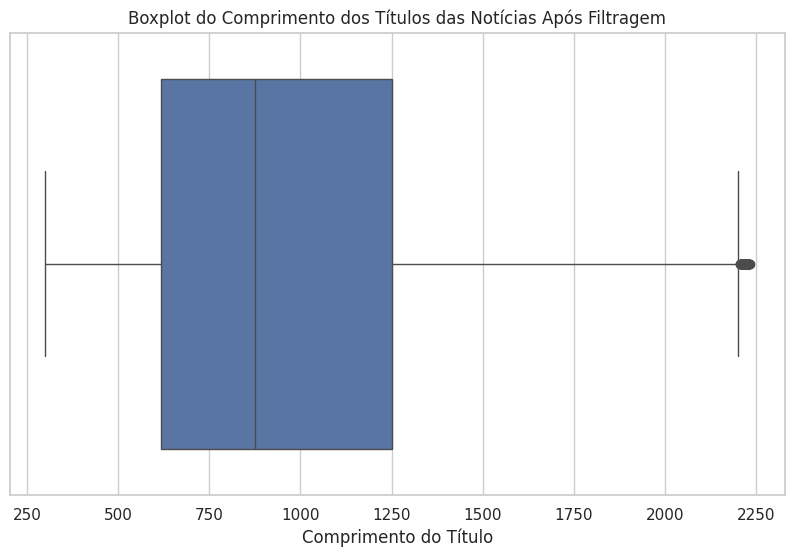

In [58]:
# Plot do comprimento dos títulos após a filtragem
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['text_length'])
plt.title('Boxplot do Comprimento dos Títulos das Notícias Após Filtragem')
plt.xlabel('Comprimento do Título')
plt.show()

# Configura o estilo do gráfico
sns.set(style="whitegrid")

# Visualização da distribuição de fontes
plt.figure(figsize=(12, 8))
source_counts = df_filtered['source'].value_counts()
sns.barplot(y=source_counts.values, x=source_counts.index, color='blue')
plt.title('Distribuição de Fontes no Dataset após Filtragem')
plt.ylabel('Número de Posts')
plt.xlabel('Fontes')
plt.xticks(rotation=90)
plt.show()

Após a aplicação do limiar de corte no comprimento do texto, observamos algumas mudanças importantes nas características do nosso dataset:

* Aumento na Mediana do Comprimento do Texto
O boxplot do comprimento dos textos mostra um aumento na mediana após a filtragem, o que era esperado, pois removemos os textos mais curtos. Este aumento indica que o dataset agora está mais focado em conteúdos detalhados, o que pode ser benéfico para o desempenho dos modelos.

* Distribuição de Classes Após Filtragem
A distribuição das classes mostra que, apesar do desbalanceamento continuar presente, houve alterações na frequência de algumas fontes. Notavelmente, a Revista Época, que anteriormente era a fonte mais frequente, agora aparece em segundo lugar, e a classe El País Brasil toma a dianteira.

## 5.2 - Preparação do DataFrame para Modelagem

Antes de avançarmos para a modelagem, é importante refinar o DataFrame para garantir que ele contenha apenas as informações necessárias para treinar os modelos. Isso envolve um foco específico nas colunas `title` e `source`, que são essenciais para o nosso objetivo de classificação.

Em vez de processar os dados durante a execução deste notebook, carregamos uma versão já pré-processada do DataFrame, disponibilizada através de um arquivo no GitHub afim de economizar tempo.



In [59]:
# Reduzindo o DataFrame para manter apenas 'title' e 'source'
df_model = df_insta_news[['title', 'source']]

# Aplicar a função de preprocessamento no dataframe
#preprocess_text(df_model)

# Ler o df preprocessado
url_preprocessed = 'https://github.com/pbrandao26/ML_Advanced_Analytics_MVP_2024/raw/main/processed_insta_news.pkl'
df_model = pd.read_pickle(url_preprocessed)


# 6 - Modelagem da Rede Neural

---



Com o pré-processamento concluído, entramos agora na fase de modelagem, na qual treinaremos um modelo de rede neural densa (feedforward). Esta escolha de arquitetura é baseada na premissa de que, dada a natureza compacta dos textos do Instagram, um modelo mais complexo como uma rede neural recorrente pode não trazer benefícios significativos para o objetivo em questão. Acreditamos que uma rede neural densa com múltiplas camadas seja adequada para capturar as características essenciais dos textos e realizar a classificação das fontes com eficácia.

Os passos seguintes incluem a descrição detalhada do treinamento do modelo Word2Vec e da arquitetura da rede neural. O Word2Vec será fundamental no processo de converter palavras em vetores numéricos, capturando a semântica e o contexto de uso no corpus do Instagram. Através do Word2Vec, transformaremos os tokens dos títulos das notícias em vetores e utilizaremos a média desses vetores como features para alimentar a rede neural.

## 6.1 - Divisão em Treino e Teste

Nesta etapa, aplicamos o método de Holdout, reservando 20% do dataset para o teste e os 80% restantes para o treinamento. O uso de uma semente fixa para reprodutibilidade (random_state=42) é essencial para garantir que os resultados sejam consistentes em várias execuções. Os títulos preprocessados compõem as features (X_train, X_test) enquanto que a fonte das notícias é o target (y_train, y_test).


In [60]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    df_model['processed_title'],  # Features - títulos preprocessados
    df_model['source'],           # Target - fonte da notícia
    test_size=0.2,                # Tamanho do conjunto de teste (20% do total)
    random_state=42               # Semente para reprodutibilidade
)

## 6.2 - Otimização de Hiperparâmetros

Definimos uma série de hiperparâmetros para testar diversas configurações em busca da melhor performance. Os hiperparâmetros que variamos incluem taxas de dropout, tipos de otimizadores, tamanhos de lotes, número de épocas, unidades nas camadas densas e funções de ativação.

Ao configurar múltiplas opções para cada hiperparâmetro, como taxas de dropout variando de 0.2 a 0.5 e otimizadores como Adam e RMSprop, testamos uma vasta gama de combinações possíveis. Combinando todas as possibilidades desses hiperparâmetros, testaremos um total de 192 configurações diferentes de modelos.

O objetivo é identificar a configuração que resulta na maior acurácia, garantindo que o modelo seja tanto robusto quanto eficiente. Durante esse processo, monitoramos o desempenho de cada configuração, atualizando `best_score` sempre que um novo modelo excede o desempenho dos anteriores, e armazenando os hiperparâmetros correspondentes em `best_params`.


In [61]:
# Definir os hiperparâmetros para testar
dropout_rates = [0.2, 0.3, 0.4, 0.5]
optimizers = ['adam', 'rmsprop']
batch_sizes = [32, 64]
epochs = [50, 100]
dense_units_options = [(512, 256, 128), (256, 128, 64), (1024, 512, 256)]
activations = ['relu', 'leaky_relu']

# Melhor modelo e pontuação
best_score = 0
best_params = {}

## 6.3 - Treinamento do Modelo Word2Vec

Durante a fase de modelagem, um passo essencial foi a configuração e o treinamento do modelo Word2Vec, essencial para transformar texto em vetores numéricos que representam as palavras de maneira semântica. Devido ao alto custo computacional e ao tempo necessário para treinar modelos Word2Vec, utilizamos a cláusula `if False` para evitar a reexecução dessa etapa cada vez que o notebook é carregado. Este método nos permitiu focar na análise e na discussão dos resultados sem o retrabalho de treinar o modelo repetidamente.

O modelo foi ajustado manualmente ao longo do projeto para otimizar sua acurácia. Os parâmetros finais foram escolhidos após várias iterações de testes que buscaram a melhor configuração para nosso conjunto de dados específico. A configuração final inclui:

- **vector_size=300**: Define o tamanho do vetor de features para cada palavra, com 300 dimensões, proporcionando uma rica representação semântica.
- **window=3**: O tamanho da janela contextual afeta quantas palavras antes e depois da palavra-alvo serão consideradas pelo modelo.
- **min_count=2**: Palavras que aparecem menos de duas vezes são ignoradas. Isso ajuda a eliminar ruídos dos dados.
- **sample=1e-3**: Configura o threshold para configuração de downsampling de palavras frequentes.
- **alpha=0.025**: A taxa de aprendizado inicial.
- **min_alpha=0.0025**: A taxa de aprendizado diminui linearmente até esse valor conforme o treinamento avança.
- **negative=20**: Usa amostragem negativa, especificando quantas "palavras de ruído" devem ser consideradas durante o treinamento.
- **workers=cores-1**: Aproveita o paralelismo usando todos os cores disponíveis na máquina, menos um, para maximizar a eficiência do treinamento.

Para garantir que o modelo Word2Vec fosse treinado apenas com dados relevantes e sem vazamento de informações entre os conjuntos de treino e teste, uma lista de tokens foi preparada exclusivamente a partir do conjunto de treino. Com essa lista, construímos o vocabulário e, subsequentemente, treinamos o modelo Word2Vec por 60 épocas.


In [62]:
if False:
  # Definindo os múltiplos cores para o modelo
  cores = multiprocessing.cpu_count()

  # Preparar a lista de tokens corretamente
  l_tokens = X_train.tolist()

  # Instanciar um novo modelo Word2Vec
  word2vec_model = Word2Vec(
      vector_size=300,
      window=3,
      min_count=2,
      sample=1e-3,
      alpha=0.025,  # Inicial
      min_alpha=0.0025,  # Final
      negative=20,
      workers=cores-1
          )

  # Construir vocabulário e treinar o modelo
  word2vec_model.build_vocab(l_tokens)
  word2vec_model.train(l_tokens, total_examples=word2vec_model.corpus_count, epochs=60)


## 6.4 - Treinamento da Rede Neural

O treinamento da rede neural é a etapa central do nosso projeto, onde aplicamos as técnicas de aprendizado profundo para classificar as fontes das notícias com base em seus títulos processados. Este processo envolve uma série de passos críticos, desde a definição dos hiperparâmetros até a validação dos modelos treinados, garantindo a obtenção de um modelo eficaz e robusto.

Importante ressaltar que esta etapa também foi encapsulada dentro de uma cláusula `if False` para evitar a execução repetida dessa etapa demorada cada vez que o notebook é aberto. Isso é especialmente importante considerando o tempo e os recursos computacionais necessários para treinar diversas configurações de redes neurais. Os resultados mais significativos, como o melhor modelo identificado, os hiperparâmetros mais eficazes e o histórico de treinamento, foram salvos após o fim do processo. Após a conclusão do treinamento, esses dados foram exportados para o Google Drive, garantindo que possam ser acessados e revisados posteriormente sem a necessidade de reexecutar o treinamento.

Inicialmente, configuramos a validação cruzada usando KFold com três divisões. Este método nos permite avaliar a generalização do modelo de forma mais rigorosa, ao treinar e validar em diferentes subconjuntos dos dados de treino. Utilizamos também o LabelEncoder para transformar as categorias textuais das fontes em labels numéricos que podem ser processados pelo modelo.

Para a otimização, definimos uma matriz de hiperparâmetros, a partir das listas já definidas, incluindo taxas de dropout, otimizadores, tamanhos de lote, número de épocas, configurações das unidades nas camadas densas e tipos de ativação. Esses parâmetros foram combinados em várias configurações para explorar o espaço de hiperparâmetros de forma abrangente e identificar a combinação que maximiza a acurácia do modelo.

Durante o treinamento, aplicamos o SMOTE (Synthetic Minority Oversampling Technique) para balancear as classes nos dados de treino, visando reduzir o viés devido ao desbalanceamento inicial das classes. O SMOTE é uma técnica de over-sampling que cria dados sintéticos da classe minoritária até que a base de treinamento atinga o equilibrio de 50% para todas as classes. A vetorização dos títulos foi realizada usando o modelo Word2Vec treinado, transformando os textos em vetores numéricos que servem como entrada para a rede. Em cada loop foram cuidadosamente separados novos conjuntos de validação e treino a partir do conjunto de treino já separado anteriormente. O balanceamento foi aplicado somente no novo conjunto de treino separado a cada fold de cada iteração.

Cada configuração de modelo foi compilada e treinada iterativamente dentro dos loops de validação cruzada. Utilizamos callbacks como EarlyStopping com uma tolerância de 20 épocas para interromper o treinamento se a perda aumentasse muito após número de épocas, monitorando como função de perda a '`categorical_crossentropy`', garantindo que o modelo não se ajustasse demais aos dados de treino.

O desempenho de cada modelo foi cuidadosamente monitorado, e os resultados foram registrados para posterior análise. O modelo que alcançasse a maior acurácia de validação teria seus parâmetros e configurações armazenados como os melhores encontrados durante a otimização. Este modelo seria então considerado nosso 'modelo ótimo', configurado para oferecer o melhor equilíbrio entre acurácia e generalização, baseado na métrica de acurácia de validação.



### 6.4.1 - Arquitetura da Rede Neural

A arquitetura da rede neural escolhida para este projeto foi desenvolvida com o objetivo de alcançar a máxima eficiência e precisão na classificação das fontes de notícias com base nos títulos. A escolha dessa arquitetura específica foi baseada em testes comparativos com outras configurações menos complexas, que não atingiram a mesma acurácia.

A rede neural densa é composta por várias camadas, configuradas da seguinte forma:

- Uma **primeira camada densa** com um número de unidades que variam como parte de nosso processo de otimização de hiperparâmetros, utilizando o inicializador 'he_uniform'. Este inicializador é baseado em uma distribuição uniforme e ajuda a manter a escala apropriada dos gradientes, facilitando a aprendizagem eficiente em redes mais profundas.
- **Camadas intermediárias** equipadas com normalização em lote e dropout, cada uma configurada para melhorar a estabilidade do treinamento e reduzir o overfitting. A regularização L2, com um coeficiente de 0.01, é aplicada para suavizar a função de perda e minimizar o ajuste excessivo.
- **Funções de ativação parametrizáveis**, como 'relu' e 'leaky_relu', são utilizadas para permitir que a rede capture padrões e relações complexas nos dados de maneira eficiente.
- A **camada de saída** utiliza a função de ativação 'softmax', ideal para a tarefa de classificação multiclasse ao calcular a probabilidade de cada classe, facilitando a interpretação dos resultados como probabilidades claras de classificação.


In [63]:
# Definir o número de folds para a validação cruzada
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Encodificador de rótulos
label_encoder = LabelEncoder()

# Lista de resultados para guardar o histórico do aprendizado da rede neural
results = []

In [64]:
if False:
  # Loop para testar os hiperparâmetros
  for dropout, optimizer, batch_size, epoch, (units1, units2, units3), activation in itertools.product(dropout_rates, optimizers, batch_sizes, epochs, dense_units_options, activations):
      print(f"Testando o modelo com dropout={dropout}, optimizer={optimizer}, batch_size={batch_size}, epochs={epoch}, units={units1}; {units2}; {units3}, activation={activation}")

      for train_index, test_index in kf.split(X_train):
          # Dividir dados em treino e validação dentro dos dados originais não balanceados
          X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
          y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

          # Vetorização dos títulos no conjunto de treino e validação
          X_train_vectors = X_train_fold.apply(lambda x: vectorize_text(x, word2vec_model))
          X_val_vectors = X_val_fold.apply(lambda x: vectorize_text(x, word2vec_model))

          # Aplicar SMOTE nos vetores para balanceamento das classes
          smote = SMOTE(random_state=42)
          X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(np.stack(X_train_vectors), y_train_fold)

          # Codificação das classes
          y_train_encoded = label_encoder.fit_transform(y_train_fold_resampled)
          y_val_encoded = label_encoder.transform(y_val_fold)

          y_train_categorical = to_categorical(y_train_encoded)
          y_val_categorical = to_categorical(y_val_encoded)

          # Definir a arquitetura da Rede Neural para cada fold
          model = Sequential([
              Dense(units1, input_dim=300, kernel_initializer='he_uniform'),
              BatchNormalization(),
              Activation(activation),
              Dropout(dropout),

              Dense(units2, kernel_regularizer=l2(0.01)),
              BatchNormalization(),
              Activation(activation),
              Dropout(dropout),

              Dense(units3, kernel_regularizer=l2(0.01)),
              BatchNormalization(),
              Activation(activation),
              Dropout(dropout),

              Dense(len(label_encoder.classes_), activation='softmax')
          ])

          # Compilar o modelo
          model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
          stop_early = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

          # Treinar o modelo
          history = model.fit(
              X_train_fold_resampled, y_train_categorical,
              validation_data=(np.array(X_val_vectors.tolist()), y_val_categorical),
              epochs=epoch, batch_size=batch_size, callbacks=[stop_early], verbose=1
          )
          # Guardar os resultados
          results.append(history.history)

          # Evaluate the model
          score = np.max(history.history['val_accuracy'])

          if score > best_score:
              best_score = score
              best_params = {'dropout': dropout, 'optimizer': optimizer, 'batch_size': batch_size, 'epochs': epoch, 'units': (units1, units2, units3), 'activation': activation}
              best_model = model
              best_word2vec = word2vec_model
              best_history = history.history


In [65]:
if False:
  # Define o diretório base para salvar os resultados
  base_path = '/content/drive/My Drive/MVP_DL/'

  # Cria o diretório se não existir
  os.makedirs(base_path, exist_ok=True)

  # Salvar o modelo Keras
  model_path = os.path.join(base_path, 'best_model')
  best_model.save(model_path)

  # Salvar o modelo Word2Vec
  w2v_path = os.path.join(base_path, 'best_word2vec.model')
  best_word2vec.save(w2v_path)

  # Salvar os outros objetos
  with open(os.path.join(base_path, 'best_score.pkl'), 'wb') as f:
      pickle.dump(best_score, f)

  with open(os.path.join(base_path, 'best_params.pkl'), 'wb') as f:
      pickle.dump(best_params, f)

  with open(os.path.join(base_path, 'best_history.pkl'), 'wb') as f:
      pickle.dump(best_history, f)

  with open(os.path.join(base_path, 'results.pkl'), 'wb') as f:
      pickle.dump(results, f)


In [66]:
# Define o diretório base no GitHub para baixar os resultados
base_url = 'https://raw.githubusercontent.com/pbrandao26/ML_Advanced_Analytics_MVP_2024/main/MVP_DL_files/'

# Função que executa o download do modelo e dos arquivos no github
def download_file(url):
    response = requests.get(url)
    response.raise_for_status()
    return response.content

# Carregar o modelo Keras
model_content = download_file(base_url + 'best_model.h5')
with open('best_model.h5', 'wb') as f:
    f.write(model_content)
best_model = load_model('best_model.h5')

# Carregar os outros objetos
best_score = pickle.loads(download_file(base_url + 'best_score.pkl'))
best_params = pickle.loads(download_file(base_url + 'best_params.pkl'))
best_history = pickle.loads(download_file(base_url + 'best_history.pkl'))
results = pickle.loads(download_file(base_url + 'results.pkl'))
label_encoder = pickle.loads(download_file(base_url + 'label_encoder.pkl'))

# Para baixar o modelo Word2Vec do Google Drive
w2v_model_link = 'https://drive.google.com/uc?id=18fGmZUCL_JhC-rop59KwDXgC2_IkQGej'
w2v_vectors_link = 'https://drive.google.com/uc?id=1BrezsUvi6opI75EmKrze3AE02W5dSSo-'
w2v_syn1neg_link = 'https://drive.google.com/uc?id=1JIFJAjLG2YX2jQ1iIyAv0nKcOVbQvyDG'
gdown.download(w2v_model_link, 'best_word2vec.model', quiet=False)
gdown.download(w2v_vectors_link, 'best_word2vec.model.wv.vectors.npy', quiet=False)
gdown.download(w2v_syn1neg_link, 'best_word2vec.model.syn1neg.npy', quiet=False)

# Carregar o modelo Word2Vec
best_word2vec = Word2Vec.load('best_word2vec.model')

Downloading...
From: https://drive.google.com/uc?id=18fGmZUCL_JhC-rop59KwDXgC2_IkQGej
To: /content/best_word2vec.model
100%|██████████| 1.87M/1.87M [00:00<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BrezsUvi6opI75EmKrze3AE02W5dSSo-
To: /content/best_word2vec.model.wv.vectors.npy
100%|██████████| 66.5M/66.5M [00:00<00:00, 118MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JIFJAjLG2YX2jQ1iIyAv0nKcOVbQvyDG
To: /content/best_word2vec.model.syn1neg.npy
100%|██████████| 66.5M/66.5M [00:00<00:00, 69.7MB/s]


### 6.4.2 - Resultados do Treinamento

Após o processo de treinamento e otimização de hiperparâmetros, conseguimos identificar a configuração ideal que maximizou a acurácia do nosso modelo ótimo de rede neural.

O melhor score de validação alcançado foi de aproximadamente 84.87%. A primeira vista esta acurácia parece ser significativa, considerando a complexidade do problema e a variedade de fontes no dataset. Vamos futuramente aplicar o modelo no conjunto de teste e veriricar se este resultado de fato se mantem.

A melhor combinação de hiperparâmetros que levou a este desempenho inclui uma taxa de dropout de 0.4, para prevenir o overfiting, o otimizador 'adam' foi escolhido por sua eficiência em ajustar os pesos com base nos gradientes estimados, convergência mais rápida e estável. A configuração do tamanho do lote de foi 64 e de épocas foi 50. Porém precisamos avaliar se os modelos realmente chegaram a ser treinados por essa quantidade de épocas ou pararam mais cedo devido ao EarlyStop.

As unidades nas camadas densas foram configuradas como (512, 256, 128), e a função de ativação 'relu' foi utilizada por sua capacidade de introduzir não-linearidade, melhorando a capacidade do modelo de aprender e modelar complexidades.

In [67]:
print("Best score:", best_score)
print("Best params:", best_params)

Best score: 0.848690927028656
Best params: {'dropout': 0.4, 'optimizer': 'adam', 'batch_size': 64, 'epochs': 50, 'units': (512, 256, 128), 'activation': 'relu'}


### 6.4.2.1 - Gráficos de coordenadas paralelas

O gráfico de coordenadas paralelas apresentado ilustra a relação entre as diversas combinações de hiperparâmetros e a acurácia de validação obtida.

A partir do gráfico, algumas observações inicais podem ser feitas:

-  Nota-se que a maioria dos modelos parou o treinamento antes de atingir o limite máximo de épocas estabelecido, que variava entre 50 e 100 épocas. Isso sugere que o early stopping, baseado no monitoramento da função de perda de validação, foi eficaz em evitar treinamentos desnecessariamente longos e possivelmente prevenir overfitting. Curiosamente, houve modelos que cessaram o treinamento tão cedo quanto em 7 épocas, enquanto outros persistiram até 92 épocas.

- A acurácia de validação concentra-se predominantemente no espectro mais alto, com a maioria das configurações atingindo valores acima de 0.82. A variação da acurácia entre as configurações não é extensa, variando de 79,26% a 84,87%, o que pode indicar que o modelo é relativamente robusto às mudanças de hiperparâmetros, que a escolha do espaço de hiperparâmetros já estava bem otimizada ou até mesmo que possa existir um subespaço com hiperparametros que configurem resultados ainda maiores para a acurácia de vaildação.

Devido ao baixo espaço gerado pela combinação de hiperparametros, apenas com este gráfico não é possível ter uma grande clareza sobre qual variação influência
mais na acurácia de validação do modelo. Porém, como mencionado, a variabilidade da acurácia de validação como um todo foi relativamente baixa.


In [68]:
# Recriar as combinações de hiperparâmetros
combinacoes = list(itertools.product(dropout_rates, optimizers, batch_sizes, epochs, dense_units_options, activations))

# Lista para coletar dados
data = []

# Ajustar o índice para a lista de resultados
# Considerando que cada 3 entradas em results correspondem a um conjunto de hiperparâmetros
# Ajustar o índice para a lista de resultados
for i in range(0, len(results), 3):
    comb = combinacoes[i // 3]
    for j in range(3):  # Para cada fold
        history = results[i + j]

        # Encontrar o índice da época com máxima acurácia de validação
        max_val_accuracy_index = history['val_accuracy'].index(max(history['val_accuracy']))
        max_val_accuracy = history['val_accuracy'][max_val_accuracy_index]

        # Quantidade efetiva de épocas pode ser o índice + 1 (já que o índice começa em 0)
        effective_epochs = max_val_accuracy_index + 1

        # Adicionando combinação + acurácia máxima + épocas efetivas
        data.append(comb + (max_val_accuracy, effective_epochs))

# Criar DataFrame
df_hiper_par = pd.DataFrame(data, columns=['dropout', 'optimizers', 'batch_size', 'epochs', 'dense_units_options', 'activations', 'val_accuracy',  'effective_epochs'])

# Mapeamento reverso das strings para inteiros, conforme suas instruções
optimizer_mapping = {'adam': 1, 'rmsprop': 0}
activation_mapping = {'relu': 1, 'leaky_relu': 0}
# Criar mapeamento para 'dense_units_options'
dense_units_mapping = {
    (512, 256, 128): 1,
    (256, 128, 64): 2,
    (1024, 512, 256): 3
}
# Aplique o mapeamento ao DataFrame
df_hiper_par['optimizers'] = df_hiper_par['optimizers'].map(optimizer_mapping)
df_hiper_par['activations'] = df_hiper_par['activations'].map(activation_mapping)
df_hiper_par['dense_units_options'] = df_hiper_par['dense_units_options'].map(dense_units_mapping)

# Criar o gráfico de coordenadas paralelas com Plotly
fig = px.parallel_coordinates(df_hiper_par, color="val_accuracy",
                              dimensions=['dropout', 'optimizers', 'batch_size', 'epochs', 'dense_units_options', 'activations', 'effective_epochs', 'val_accuracy'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.8)

# Definir os rótulos para substituir os valores numéricos
label_dict = {
    'optimizers': {1: 'adam', 0: 'rmsprop'},
    'activations': {1: 'relu', 0: 'leaky_relu'},
    'dense_units_options': {1: '512-256-128', 2: '256-128-64', 3: '1024-512-256'}
}

# Atualize os rótulos das dimensões
for dim in fig.data[0]['dimensions']:
    if dim.label in label_dict:
        dim.tickvals = list(label_dict[dim.label].keys())
        dim.ticktext = list(label_dict[dim.label].values())

# Mostrar o gráfico
fig.show()

### 6.4.2.2 - Análise de Hiperparâmetros através de Boxplots

Cada boxplot compara as distribuições da acurácia de validação, facilitando a identificação de tendências e outliers, e potencialmente guiando a seleção de hiperparâmetros para uma otimização futura.

- Otimizadores: O gráfico mostra uma comparação entre 'adam' e 'rmsprop'. Podemos notar que ambos os otimizadores alcançam resultados comparáveis, com 'adam' apresentando uma ligeira tendência a alcançar acurácias mais altas. Isso pode ser atribuído à sua eficácia na adaptação do learning rate durante o treinamento.

- Funções de Ativação: Comparando 'relu' com 'leaky_relu', não se observa uma diferença substancial na mediana das acurácias. No entanto, 'relu' parece ter uma distribuição um pouco mais consistente, sugerindo que essa função de ativação pode ser mais confiável para este conjunto de dados específico.

- Taxa de Dropout: Os boxplots indicam que, à medida que a taxa de dropout aumenta, há uma ligeira tendência de aumento na mediana da acurácia de validação, sugerindo que uma regularização mais forte pode estar beneficiando o modelo, ajudando a prevenir o overfitting. Contudo, o modelo ótimo foi estabelecido com a segunda maior taxa de dropout, e não a primeira.

- Tamanho do Batch: Não se observam diferenças significativas entre os tamanhos de batch testados (32 e 64). Isso pode indicar que, para o tamanho atual do dataset, o modelo não é excessivamente sensível ao tamanho do batch, dentro do intervalo considerado.

- Configuração das Unidades Densas: As três configurações de unidades densas (512-256-128, 256-128-64, 1024-512-256) apresentam variações na acurácia de validação, com a configuração intermediária (256-128-64) exibindo a mediana mais alta. Isso pode sugerir que uma capacidade moderada da rede é suficiente para capturar as nuances dos dados.

In [69]:
# Substituir códigos numéricos por labels para melhor visualização
df_hiper_par['optimizers'] = df_hiper_par['optimizers'].map({1: 'adam', 0: 'rmsprop'})
df_hiper_par['activations'] = df_hiper_par['activations'].map({1: 'relu', 0: 'leaky_relu'})
df_hiper_par['dense_units_options'] = df_hiper_par['dense_units_options'].map({1: '512-256-128', 2: '256-128-64', 3: '1024-512-256'})

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Duas linhas, três colunas, mas usaremos apenas cinco espaços

# Impacto do Otimizador na Acurácia de Validação
sns.boxplot(x='optimizers', y='val_accuracy', data=df_hiper_par, ax=axes[0, 0])
axes[0, 0].set_title('Impact of Optimizer on Validation Accuracy')

# Impacto da Função de Ativação na Acurácia de Validação
sns.boxplot(x='activations', y='val_accuracy', data=df_hiper_par, ax=axes[0, 1])
axes[0, 1].set_title('Impact of Activation Function on Validation Accuracy')

# Impacto do Dropout na Acurácia de Validação
sns.boxplot(x='dropout', y='val_accuracy', data=df_hiper_par, ax=axes[0, 2])
axes[0, 2].set_title('Impact of Dropout Rate on Validation Accuracy')

# Impacto do Tamanho do Batch na Acurácia de Validação
sns.boxplot(x='batch_size', y='val_accuracy', data=df_hiper_par, ax=axes[1, 0])
axes[1, 0].set_title('Impact of Batch Size on Validation Accuracy')

# Impacto da Configuração das Unidades Densas na Acurácia de Validação
sns.boxplot(x='dense_units_options', y='val_accuracy', data=df_hiper_par, ax=axes[1, 1])
axes[1, 1].set_title('Impact of Dense Units Configuration on Validation Accuracy')

# Ocultar o subplot vazio na segunda linha, terceira coluna
axes[1, 2].set_visible(False)

plt.tight_layout()
plt.show()

### 6.4.2.3 - Gráficos de perda e acurácia ao longo das épocas

- **Gráfico de Acurácia e Perda do modelo ótimo**:
O primeiro gráfico é uma visualização combinada da acurácia e da perda ao longo das épocas de treinamento, utilizando dois eixos Y, o eixo da esqueda para a acurácia e o da direita para a perda. No gráfico, observamos que a acurácia tanto do treino quanto da validação aumenta ao longo do tempo, o que é esperado e desejável. Nota-se que a acurácia da validação segue um padrão próximo à acurácia do treino, o que pode indicar um bom ajuste do modelo sem overfitting significativo. Em relação à perda, ambas as curvas (treino e validação) apresentam uma tendência de queda, estabilizando-se à medida que as épocas avançam, o que sugere convergência do modelo. O modelo ótimo aparentemente foi treinado até 40 épocas, não chegando ao limite de 50 épocas definido pelo hipeparâmetro.
Podemos verificar também que a perda do modelo ótimo no treinamento começa alta e decresce rapidamente, um indicativo de que o modelo está aprendendo a partir dos dados. A acurácia de treinamento começa relativamente baixa, mas aumenta de forma estável, alcançando altos valores, o que denota uma boa capacidade de generalização. A perda e a acurácia de validação seguem um padrão similar, mas com valores ligeiramente mais altos para a perda e mais baixos para a acurácia, como esperado. Novamente, é importante ressaltar que a curva de validação não apresenta uma discrepância grande em relação à curva de treino, o que reforça que não há evidências de overfitting.


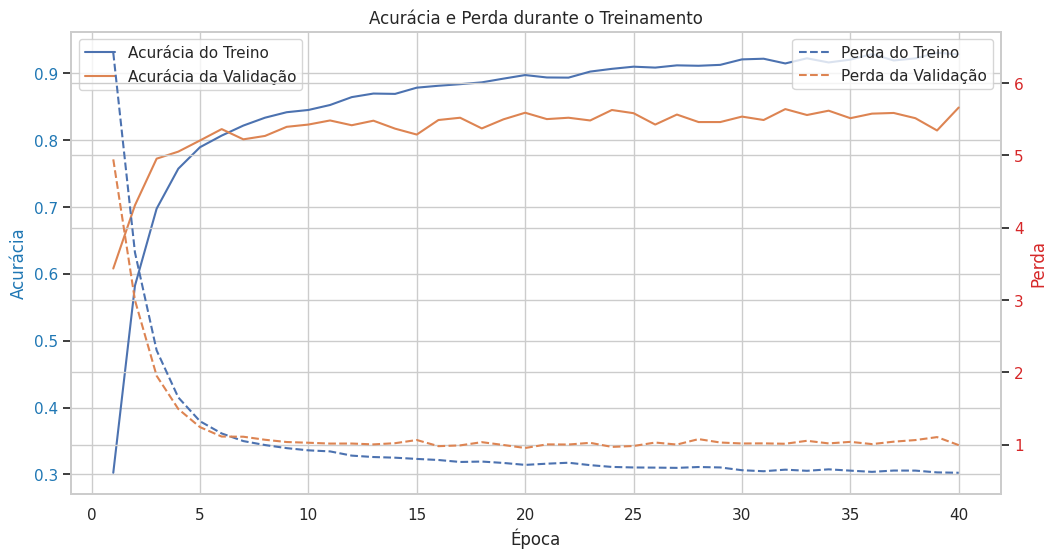

In [70]:
# Definindo epochs
epochs_range = range(1, len(best_history['accuracy']) + 1)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar a acurácia
ax1.set_xlabel('Época')
ax1.set_ylabel('Acurácia', color='tab:blue')
ax1.plot(epochs_range, best_history['accuracy'], label='Acurácia do Treino')
ax1.plot(epochs_range, best_history['val_accuracy'], label='Acurácia da Validação')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Criar um segundo eixo y para a perda
ax2 = ax1.twinx()
ax2.set_ylabel('Perda', color='tab:red')
ax2.plot(epochs_range, best_history['loss'], label='Perda do Treino', linestyle='--')
ax2.plot(epochs_range, best_history['val_loss'], label='Perda da Validação', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Título do gráfico
plt.title('Acurácia e Perda durante o Treinamento')

# Mostrar o gráfico
plt.show()

- **Gráfico de Comparação Entre Modelos**:
No segundo gráfico, plotamos a perda e a acurácia para o melhor modelo em cores distintas, azul e vermelho, enquanto os outros modelos são representados em tons de cinza, com as curvas de teste em cinza claro e as curvas de validação em cinza escuro. Este design visualmente intuitivo destaca o desempenho superior do melhor modelo em comparação com as 192 configurações resultantes da otimização dos hiperparâmetros, além dos 3 folds de validação cruzada, somando 576 treinamentos. Observa-se que a curva de acurácia de validação do modelo ótimo supera as demais curvas de validação, o que é esperado, considerando que essa métrica foi utilizada para definir o melhor modelo. A acurácia de teste parece ser alta, embora não seja excepcionalmente distinta, visto que outros modelos alcançaram acurácias de teste comparáveis ou até superiores, porém sem apresentar a mesma eficiência na validação. Em termos de perda, o modelo ótimo segue um padrão semelhante ao dos outros, com uma rápida estabilização num patamar baixo tanto para o treino quanto para a validação. A curva do modelo ótimo ainda se destaca por manter o patamar de perda num nível mais baixo do que a maioria.

In [71]:
# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plotar as curvas de perda
for result in results:
    ax1.plot(result['loss'], color='lightgray')  # Curvas de outros modelos em cinza
    ax1.plot(result['val_loss'], color='gray', linestyle='--')
ax1.plot(epochs_range, best_history['loss'], label='Melhor Perda do Treino', color='blue')  # Melhor modelo em azul
ax1.plot(epochs_range, best_history['val_loss'], label='Melhor Perda da Validação', color='red', linestyle='--')  # Melhor modelo em laranja
ax1.set_title('Perda durante o Treinamento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Perda')
ax1.legend(loc='upper right')

# Plotar as curvas de acurácia
for result in results:
    ax2.plot(result['accuracy'], color='lightgray')  # Curvas de outros modelos em cinza
    ax2.plot(result['val_accuracy'], color='gray', linestyle='--')
ax2.plot(epochs_range, best_history['accuracy'], label='Melhor Acurácia do Treino', color='blue')  # Melhor modelo em azul
ax2.plot(epochs_range, best_history['val_accuracy'], label='Melhor Acurácia da Validação', color='red', linestyle='--')  # Melhor modelo em laranja
ax2.set_title('Acurácia durante o Treinamento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Acurácia')
ax2.legend(loc='lower right')

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()


# 7 - Aplicando a Rede Neural no conjunto de teste

---



Nesta etapa aplicamos a rede neural treinada ao conjunto de teste e então realmente avaliamos a capacidade do modelo de generalizar para dados novos, aqueles que não foram usados durante o treinamento. Iniciamos com a vetorização dos títulos do conjunto de teste, uma etapa necessária para transformar o texto bruto em um formato que o modelo possa compreender. Utilizamos a representação vetorial, ou word embeddings, proveniente do Word2Vec para garantir que as nuances do idioma e o contexto semântico sejam capturados. Com as representações vetoriais prontas, procedemos à codificação das classes de teste, um processo que converte os rótulos categóricos em um formato numérico que o modelo possa processar.



In [72]:
# Vetorização dos títulos no conjunto de teste
X_test_vectors = X_test.apply(lambda x: vectorize_text(x, best_word2vec))
X_test_prepared = np.array(X_test_vectors.tolist())

# Codificação das etiquetas de teste
y_test_encoded = label_encoder.transform(y_test)
y_test_categorical = to_categorical(y_test_encoded)

# Avaliar o modelo no conjunto de teste
loss, accuracy = best_model.evaluate(X_test_prepared, y_test_categorical)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Usar o modelo treinado para fazer predições no conjunto de teste
y_pred_probabilities = best_model.predict(X_test_prepared)
y_pred_encoded = np.argmax(y_pred_probabilities, axis=1)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Gerar e salvar o relatório de classificação
nn_class_report = classification_report(y_test, y_pred, output_dict=True)

# Gerar e exibir o relatório de classificação
print(classification_report(y_test, y_pred))


69/69 [==============================] - 0s 3ms/step - loss: 1.0556 - accuracy: 0.8155
Test Loss: 1.055550217628479
Test Accuracy: 0.8155031800270081
69/69 [==============================] - 0s 4ms/step
                precision    recall  f1-score   support

agencia.brasil       0.77      0.73      0.75        95
    bandnewstv       0.88      0.74      0.80        94
     bbcbrasil       0.73      0.83      0.78       102
  cartacapital       0.75      0.61      0.68        83
     cnnbrasil       0.75      0.75      0.75        88
  elpaisbrasil       0.94      0.99      0.96       119
       estadao       0.52      0.68      0.59        88
         exame       0.73      0.79      0.76       120
 folhadespaulo       0.93      0.87      0.90       116
     infomoney       0.67      0.57      0.62       120
  jornaloglobo       0.74      0.82      0.78       115
  jovempannews       0.99      0.96      0.97        74
      portalg1       0.70      0.69      0.70        65
  revistaepo

Ao examinar os resultados e comparar com o gráfico de perda durante o treinamento e validação do modelo ótimo, percebemos que a curva de perda da validação estabiliza em um patamar próximo de **1.0 a 1.1**. A perda de **1.0555** no conjunto de teste, portanto, está, aparentemente, em harmonia com o comportamento observado no gráfico para o conjunto de validação. Isso sugere que o modelo mantém um desempenho consistente ao transitar do conjunto de validação para o de teste, o que é um bom indicativo de sua capacidade de generalização.

O resultado de acurácia de validação foi de aproximadamente **84.87%** enquanto que no teste foi de aproximadamente **81.55%**. Embora a acurácia de teste esteja levemente inferior à acurácia de validação (cerca de **3,32%**), ainda assim ela reflete em um desempenho robusto do modelo. A diferença entre a acurácia da validação e do teste pode ser atribuída a uma série de fatores, incluindo a possibilidade de o conjunto de teste apresentar características ligeiramente diferentes das que o modelo foi otimizado para durante a validação. Essa variação é normal e esperada em cenários do mundo real, onde os dados podem divergir em complexidade ou distribuição.


É importante notar que a acurácia sozinha nem sempre nos dá a imagem completa,o recall e a pontuação F1 são métricas cruciais para compreender a performance de um modelo de classificação de forma mais aprofundada. O recall é uma métrica de sensibilidade, mede a proporção de exemplos positivos reais que foram corretamente identificados pelo modelo. Tecnicamente, indica a capacidade do modelo de encontrar todas as instâncias relevantes em uma categoria específica. A pontuação F1, por outro lado, é uma medida que combina a precisão e o recall em um único indicador harmonizado, calculado como a média harmônica entre essas duas métricas. Representa um balanço entre a precisão — a proporção de predições positivas corretas em relação ao total de predições positivas — e o recall. Uma pontuação F1 alta significa que o modelo não só identifica corretamente uma alta proporção dos exemplos relevantes (recall alto), mas também que a maioria das suas predições positivas é correta (precisão alta).

No contexto desse projeto, uma alta pontuação F1 nas categorias  'elpaisbrasil', 'jovempannews' e 'revistaoeste' implica que o modelo é confiável na classificação correta das notícias dessas fontes e é preciso ao não classificar incorretamente os artigos de outras fontes como pertencentes a elas. Em contra partida outras fontes, como 'estadao', têm espaço significativo para melhoria, especialmente em termos de precisão.

O alto desempenho em algumas categorias pode ser devido a características distintas dos textos que permitem ao modelo aprender e reconhecer padrões com facilidade. Por outro lado, as categorias com desempenho inferior podem sofrer com a sobreposição temática com outras fontes ou até mesmo uma quantidade menor de dados de treinamento, o que dificulta para o modelo fazer distinções claras.

##7.1 - Matriz de confusão

A matriz de confusão é um instrumento essencial na avaliação de modelos de classificação, pois apresenta de forma clara não apenas as previsões acertadas, mas também os tipos e frequências dos erros cometidos. Na diagonal principal, temos o número de previsões corretas para cada classe, e nos outros campos, os erros são dispostos de forma que cada linha indica a classe real e cada coluna, a classe prevista pelo modelo.




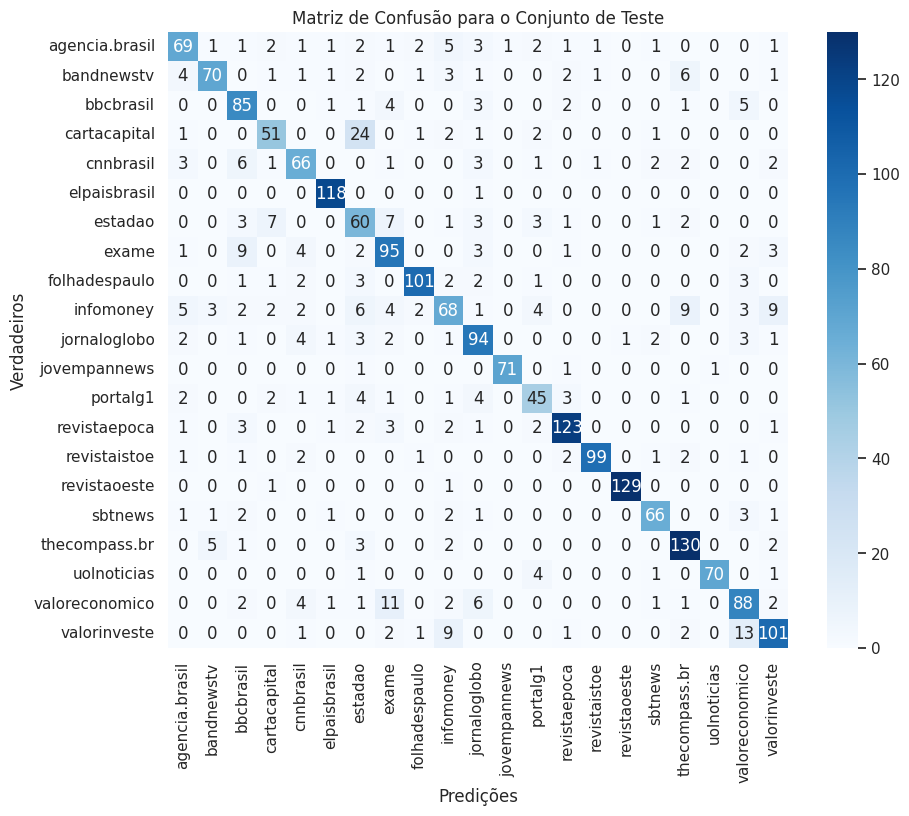

In [73]:
# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão para o Conjunto de Teste')
plt.ylabel('Verdadeiros')
plt.xlabel('Predições')
plt.show()

Ao analisar a matriz de confusão gerada para o nosso conjunto de teste, notamos que muitas classes são bem identificadas pelo modelo, como evidenciado pelos altos valores na diagonal principal, sobretudo para as categorias 'elpaisbrasil', 'folhadespaulo', 'revistaepoca' e 'revistaoeste' que apresentam mais fortemente o gradiente de cor azul. Isso reitera a competência do modelo em capturar e reconhecer com precisão as características distintas dessas categorias.

Contudo, a matriz também revela áreas onde o modelo pode ser aprimorado. Por exemplo, há uma quantidade considerável de notícias da 'cartacapital' que foi erroneamente classificada como 'estadao' e, em uma menor escala, podemos citar também 'infomoney' confundido com 'thecompass.br' e 'valorinveste', apontando para uma possível dificuldade do modelo em distinguir entre fontes de notícias com conteúdos temáticos similares, já que estas 3 últimas fontes possuem o conteúdo primordialmente focado em noticias financeiras.

Essas confusões entre categorias específicas fornecem um caminho para futuras investigações e melhorias. Ao entender em que circunstâncias e entre quais categorias o modelo confunde mais frequentemente, podemos explorar estratégias para refinar o modelo. Isso pode incluir desde a coleta de mais dados distintos para categorias que são comumente confundidas até o ajuste do pré-processamento do texto para capturar nuances mais sutis entre diferentes fontes de notícias.

## 7.2 - Curvas ROC e Precisão-Revocação

As curvas ROC e Precisão-Revocação são instrumentos para avaliar o desempenho de modelos de classificação, especialmente em cenários de classes múltiplas, como é o caso do nosso modelo, onde temos 21 classes. A curva ROC fornece uma perspectiva sobre a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos. Já a curva Precisão-Revocação nos permite observar a relação entre a precisão — que é a proporção de verdadeiros positivos entre todas as previsões positivas — e a revocação — que mede a habilidade do modelo de identificar todos os exemplos positivos.




In [74]:
# Binarize as labels para curvas ROC
y_test_binarized = label_binarize(y_test, classes=label_encoder.classes_)

# Previsões probabilísticas necessárias para a curva ROC
y_pred_prob = best_model.predict(np.array(X_test_vectors.tolist()))

# Plotar curva ROC para cada classe
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
for i, label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    ax[0].plot(fpr, tpr, label=f'{label} (area = {roc_auc:.2f})')

ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_title('Curva ROC')
ax[0].set_xlabel('Taxa de Falso Positivo')
ax[0].set_ylabel('Taxa de Verdadeiro Positivo')
ax[0].legend(loc='lower right')

# Plotar curva Precisão-Revocação para cada classe
for i, label in enumerate(label_encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    average_precision = average_precision_score(y_test_binarized[:, i], y_pred_prob[:, i])
    ax[1].plot(recall, precision, label=f'{label} (AP = {average_precision:.2f})')

ax[1].set_title('Curva Precisão-Revocação')
ax[1].set_xlabel('Revocação')
ax[1].set_ylabel('Precisão')
ax[1].legend(loc='lower left')
plt.tight_layout()
plt.show()

69/69 [==============================] - 0s 3ms/step


No gráfico da curva ROC, a área sob a curva (AUC) é um indicador do quão bem o modelo é capaz de distinguir entre as classes. Uma AUC de 1.0 representa um modelo perfeito, enquanto uma AUC de 0.5 indica um desempenho não melhor que o aleatório. A curva ROC do nosso modelo mostra AUCs impressionantemente altas para todas as classes, indicando uma alta capacidade de distinção. Por exemplo, 'elpaisbrasil', 'jovempannews', 'uolnoticias' e 'revistaoeste' atingem o patamar máximo com AUCs de 1.00, refletindo uma perfeita separação entre positivos e negativos.

Na curva Precisão-Revocação, observamos a Precisão versus Revocação para cada classe. Aqui, uma pontuação de precisão média (AP) alta indica não apenas que as previsões positivas são confiáveis, mas que o modelo também é eficaz em capturar a maioria dos exemplos positivos. Valores próximos a 1.0 para categorias como 'uolnoticias' e 'revistaoeste', com APs de 0.98 e 0.99 respectivamente, demonstram a precisão do modelo nesses casos.

No entanto, assim como já abordado, existem variações entre as classes que podem sugerir caminhos para refinamentos futuros. Por exemplo, uma AP relativamente mais baixa para 'estadao', com 0.65, sugere que melhorias podem ser feitas.


## 7.3 - LIME e Nuvem de Palavras Relevantes no Conjunto de Teste

Para aprofundar nossa compreensão das características que o modelo identifica como mais relevantes para cada classe, utilizamos a técnica de interpretação de modelos conhecida como LIME (Local Interpretable Model-agnostic Explanations). Esta técnica nos permite explicar as previsões do modelo em um nível local, ou seja, para instâncias individuais, destacando quais palavras contribuíram mais fortemente para as classificações feitas pelo modelo.

Este trecho de código específico foi encapsulado dentro de uma cláusula `if False` para evitar a execução automática e demorada durante o carregamento do notebook, o procedimento envolveu a inicialização do explainer LIME para textos, e a definição de uma função para prever probabilidades baseadas nos vetores de texto produzidos pelo modelo Word2Vec.

Para cada classe, explicamos 50 instâncias do conjunto de teste para identificar as 10 palavras cuja presença é decisiva para a classificação pelo modelo em cada instância. As palavras mais importantes foram agregadas e sua importância foi quantificada. Os resultados deste processo foram salvos e disponibilizados em um arquivo JSON, que pode ser acessado diretamente via URL do github.

No processo utilizando LIME, cada explicação gerada para uma instância específica fornece um conjunto de atributos (neste caso, palavras) junto com seus respectivos pesos, que indicam o impacto de cada palavra sobre a previsão do modelo. Esses pesos podem ser positivos ou negativos, refletindo como a presença da palavra aumenta ou diminui a probabilidade de a instância ser classificada em uma determinada classe.

Para quantificar a importância de cada palavra de maneira agregada ao longo de múltiplas explicações, somamos os pesos atribuídos a cada palavra em todas as instâncias explicadas para uma classe específica. Assim, uma palavra que consistentemente influencia o modelo a classificar as notícias como pertencentes a uma determinada fonte terá um peso agregado maior, destacando sua relevância geral para a decisão do modelo nessa classe.

Utilizando esses dados, geramos nuvens de palavras para cada classe, visualizando as palavras que têm maior peso na decisão do modelo. Cada nuvem de palavras (ou bigramas) é uma representação gráfica que destaca as palavras mais relevantes em tamanho proporcional à sua importância, oferecendo uma visão clara e intuitiva das características textuais que nosso modelo aprendeu a associar com cada fonte de notícia.



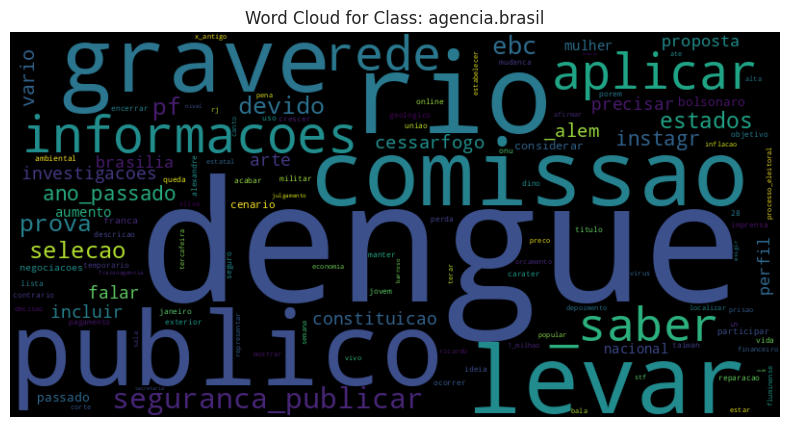

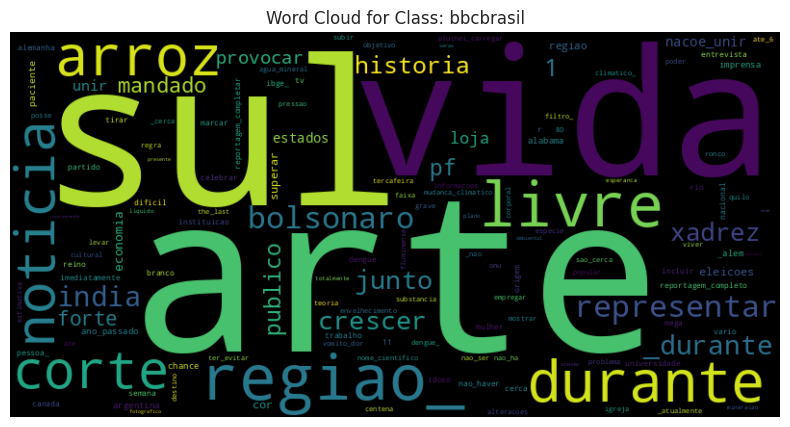

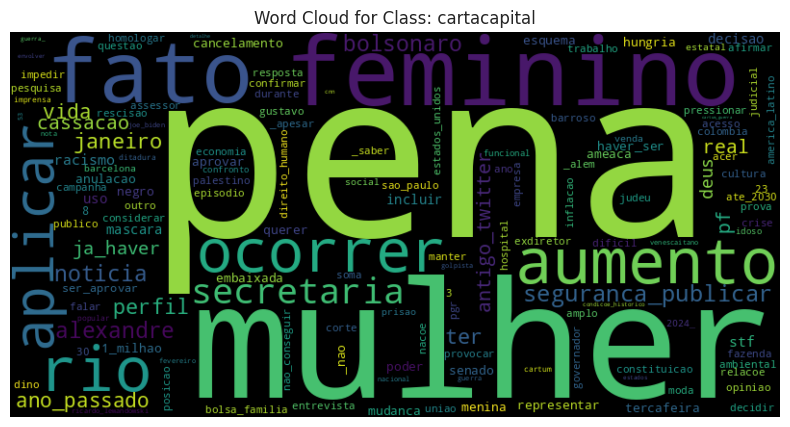

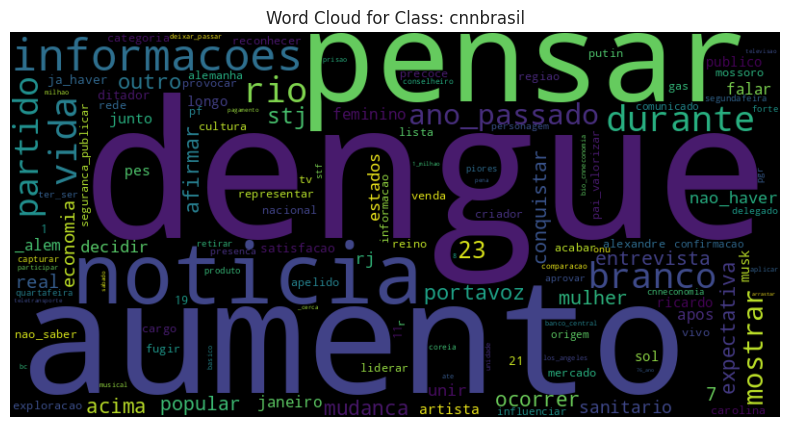

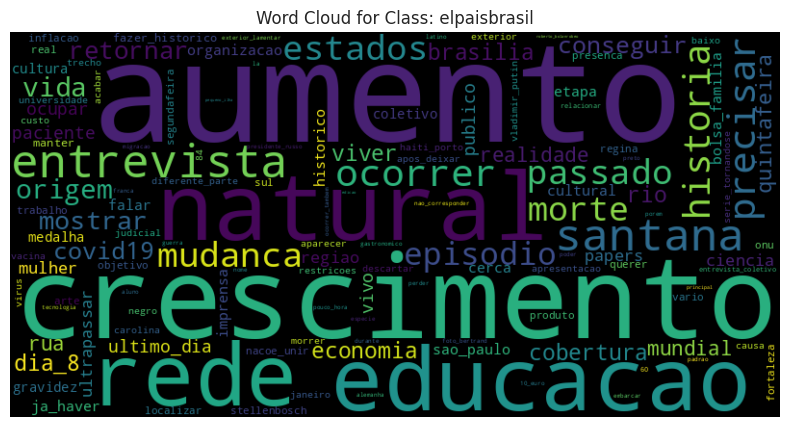

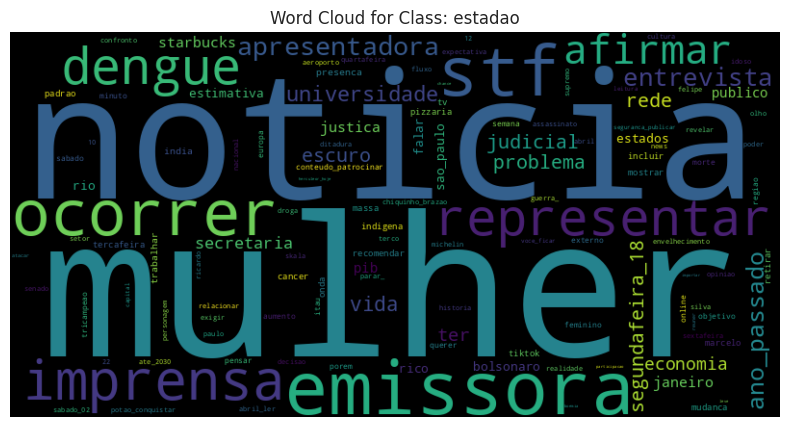

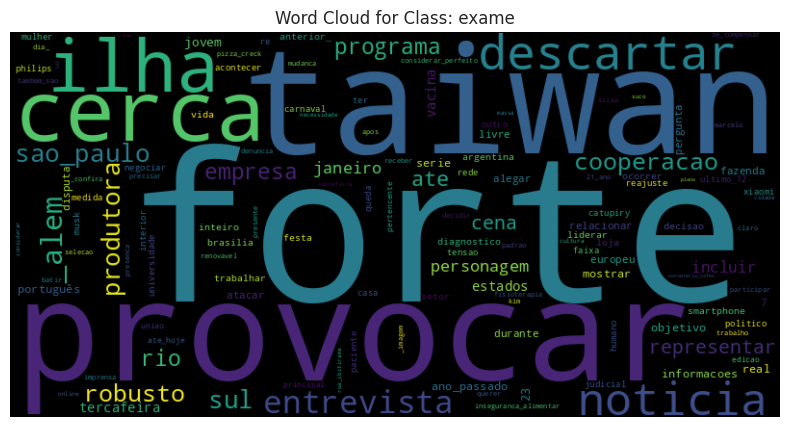

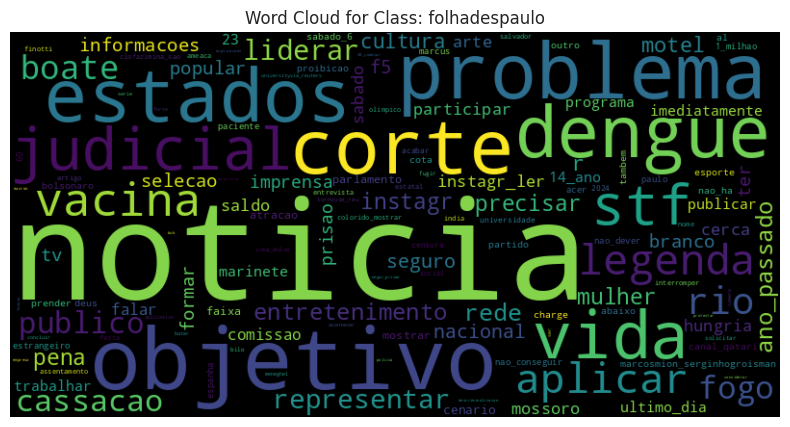

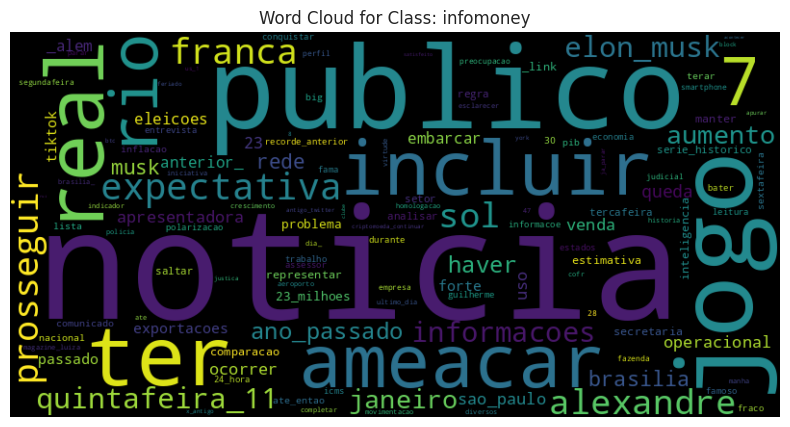

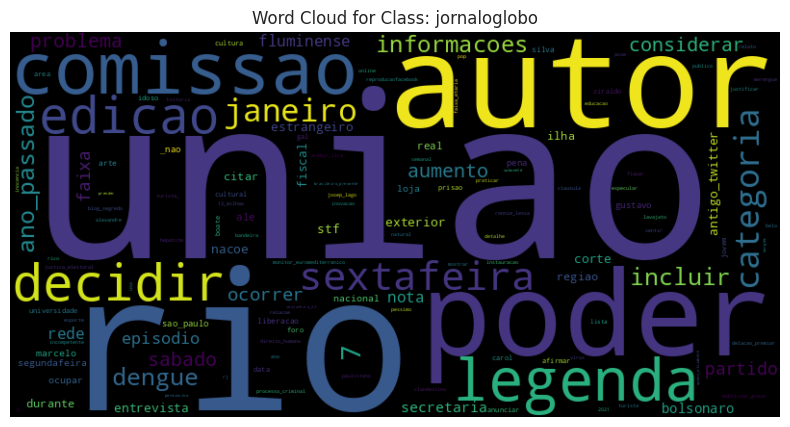

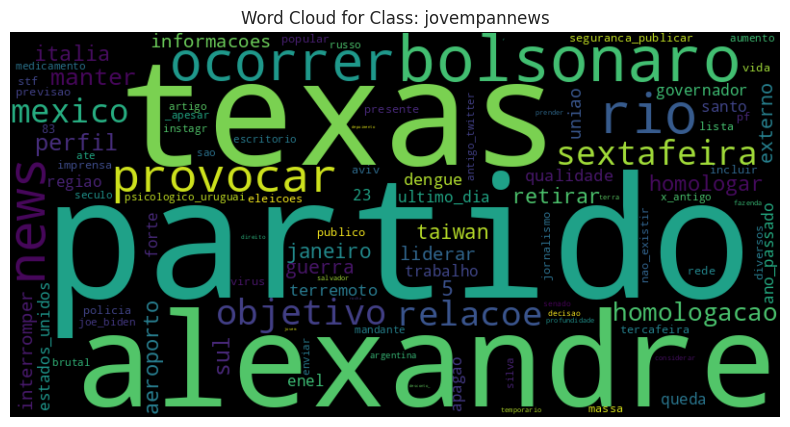

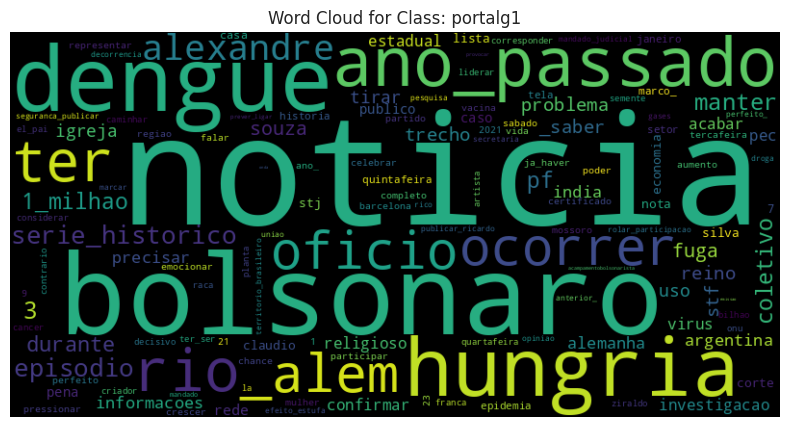

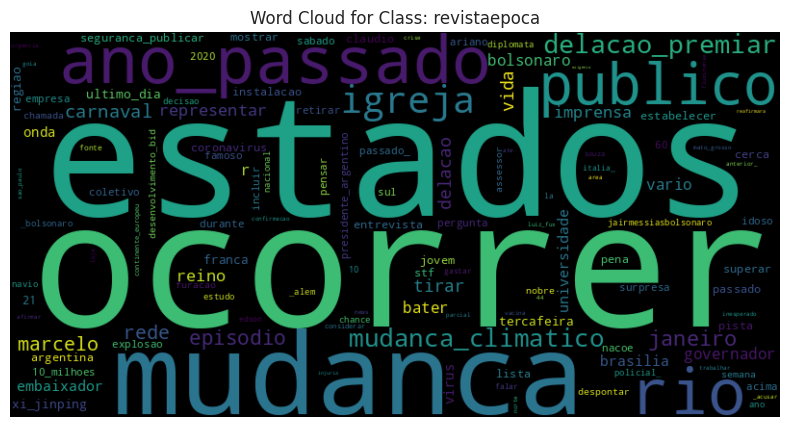

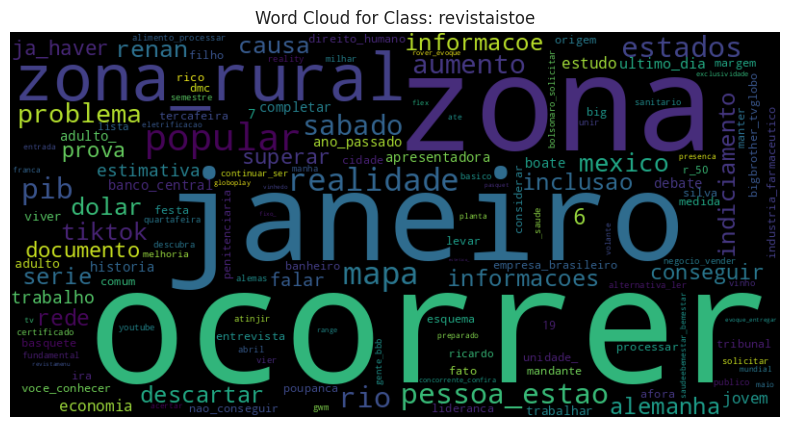

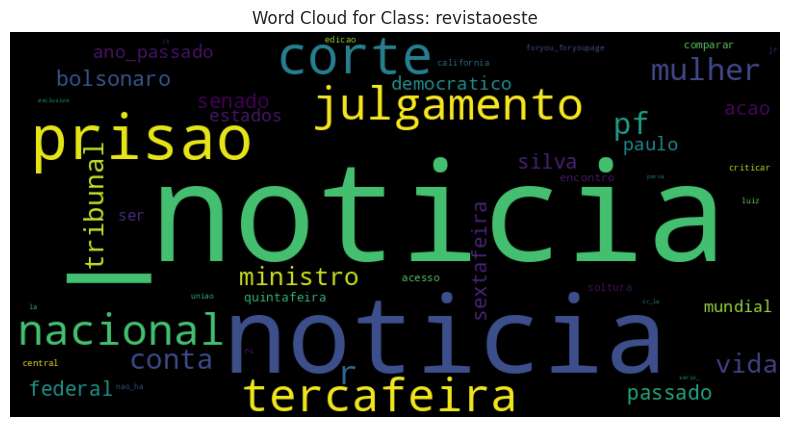

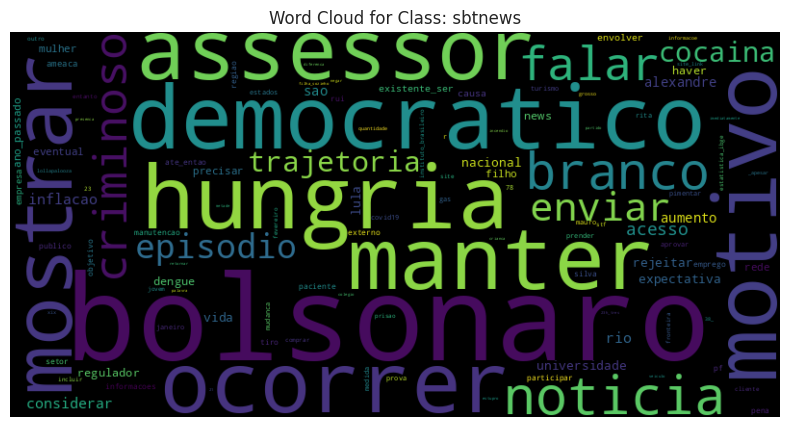

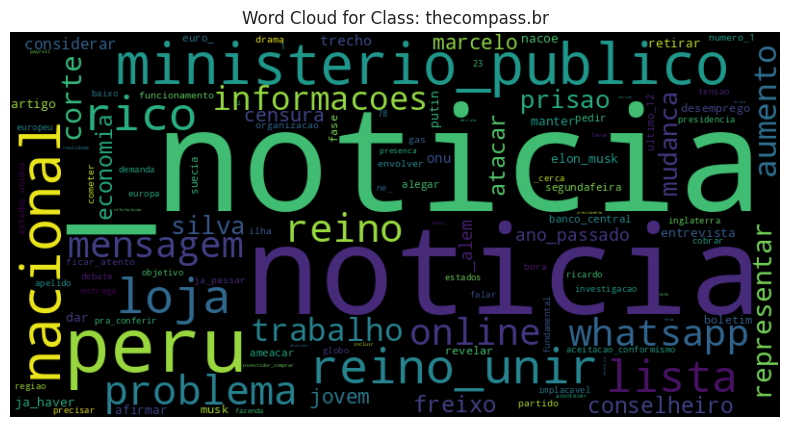

In [75]:
if False:
  # Inicialize o explainer LIME para texto
  explainer = LimeTextExplainer(class_names=label_encoder.classes_)

  # Função para prever as probabilidades
  def predict_proba(texts):
      sequences = [text.split() for text in texts]
      text_vectors = np.array([vectorize_text(sequence, best_word2vec) for sequence in sequences])
      return best_model.predict(text_vectors)

  # Dicionário para armazenar a importância das palavras para cada classe
  class_word_importance = defaultdict(lambda: defaultdict(float))

  # Para cada classe, explique várias instâncias e colete as palavras importantes
  for label in label_encoder.classes_:
      indices = np.where(y_test == label)[0]
      for idx in indices[:50]:  # Explicar 50 instâncias de cada classe
          text_instance = ' '.join(X_test.iloc[idx])
          exp = explainer.explain_instance(text_instance, predict_proba, num_features=10)
          word_importance = dict(exp.as_list())
          for word, importance in word_importance.items():
              class_word_importance[label][word] += importance
  # Salvar como JSON
  with open(os.path.join(base_path, 'class_word_importance.json'), 'w') as f:
    json.dump(class_word_importance, f, indent=4)

# URL para o arquivo JSON no GitHub
url = 'https://raw.githubusercontent.com/pbrandao26/ML_Advanced_Analytics_MVP_2024/main/MVP_DL_files/class_word_importance.json'

# Baixar o arquivo JSON
response = requests.get(url)
class_word_importance = response.json()

# Gerar e exibir nuvens de palavras
for label, words_importance in class_word_importance.items():
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(words_importance)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Class: {label}')
    plt.axis('off')
    plt.show()

A análise das nuvens de palavras geradas pelo LIME revela detalhes interessantes sobre as palavras que mais influenciam a classificação de cada fonte de notícias. Observamos, por exemplo, que a fonte 'cartacapital', conhecida por seu editorial progressista, apresenta palavras como 'mulher' e 'feminino' com destaque. Este fenômeno pode estar relacionado à frequente cobertura de temas que valorizam figuras femininas e discutem questões de gênero, aspectos frequentemente explorados por veículos com essa inclinação editorial. Curiosamente, a palavra 'mulher' também aparece com significância na nuvem de palavras do 'estadao', o que pode ajudar a explicar a confusão observada na matriz de confusão entre estas duas fontes.

Além disso, a presença marcante da palavra 'noticia' e suas derivadas em várias fontes sugere uma potencial área de melhoria para futuras versões do modelo. Considerar a remoção desses termos no pré-processamento poderia reduzir a ambiguidade e melhorar a precisão da classificação, uma vez que essas palavras são comuns e não contribuem para a distinção entre as fontes.

No contexto das notícias financeiras, é notável a ocorrência destacada da palavra 'economia' nas fontes 'valorinveste', 'thecompass.br' e 'valoreconomico', refletindo o foco temático desses veículos.

A análise também destaca a presença de termos como 'elon_musk', 'musk' e 'alexandre_morais' em várias fontes, refletindo a relevância dessas figuras nas notícias durante o período de coleta dos dados, no início de abril de 2024. Isso levanta uma questão interessante sobre a influência do contexto temporal na classificação de notícias e sugere que os resultados do modelo podem variar conforme o momento da coleta de dados.

Para aprofundar esta investigação, o projeto inclui um recurso interativo ao final deste notebook, onde o leitor pode inserir um texto de qualquer uma das 21 fontes, mesmo que seja atual e fora do período de coleta do dataset, e o modelo tentará classificar a fonte com base no texto fornecido. Esta funcionalidade não apenas demonstra a aplicabilidade prática do modelo, mas também permite testar sua robustez e adaptabilidade em diferentes contextos temporais.



# 8 - Comparação com modelos de Machine Learning e Ensambles

---

Nesta etapa do projeto, exploramos uma série de modelos de machine learning e técnicas de ensemble para comparar seus desempenhos com a rede neural que desenvolvemos anteriormente. O objetivo desta comparação é avaliar a eficácia relativa de diferentes abordagens no contexto específico do nosso problema de classificação de fontes de notícias.

- **Configuração base dos Modelos para os Ensambles**:
Diversos modelos base, incluindo Regressão Logística, Random Forest e SVM (Support Vector Machines), foram definidos inicialmente. Estes modelos foram escolhidos como base na tentativa de explorar suas caracteristicas distintas e complementares. Estes modelos serviram como base para a construção de ensembles mais complexos, como Voting Classifier, Stacking Classifier, e Gradient Boosting Classifier, que combinam as previsões de vários modelos básicos para melhorar a precisão geral:

 - Voting Classifier: Combina conceitos de múltiplos modelos para formar uma previsão final baseada na votação majoritária de classificações submodelos. Parâmetro `voting='soft'` foi escolhido para que o modelo utilize a probabilidade média de predições dos classificadores base, em vez de uma votação majoritária rígida, permitindo uma decisão mais flexível e informada.

 - Stacking Classifier: Utiliza previsões de vários modelos como entrada para um modelo final de decisão. O `final_estimator=LogisticRegression()` é usado para combinar as previsões dos modelos base, proporcionando uma capacidade de aprendizado sofisticada ao conjunto ao ajustar as predições baseadas em um modelo de regressão logística,

 - Gradient Boosting Classifier: Constrói modelos de forma sequencial, cada um tentando corrigir erros do modelo anterior. Parâmetro `n_estimators=100` especifica o número de estágios de boosting a serem realizados; esse número foi testando para tentar capturar relações complexas nos dados e ao mesmo tempo tentar manter o equilibrio para evitar overfitting.

- **Implementação Técnica**:
Para garantir a consistência e a comparabilidade dos resultados, cada modelo foi encapsulado em um pipeline do scikit-learn que inclui pré-processamento com StandardScaler para normalizar os dados. Fazemos isso pois muitos algoritmos de machine learning performam melhor quando os dados de entrada estão em uma escala comum.
A vetorização dos títulos foi realizada utilizando o modelo Word2Vec que já
havíamos treinado, assegurando que as características semânticas dos textos fossem preservadas. As classes foram codificadas numericamente para compatibilidade com as funções de avaliação e treinamento do scikit-learn. Além dos ensambles utilizados, os modelos treinados foram:

 - Regressão Logística: Modelo estatístico que utiliza uma função logística para modelar a probabilidade binária de uma ou mais variáveis independentes. Parâmetro `max_iter=1000` foi escolhido para garantir a convergência do algoritmo em datasets maiores ou mais complexos.

 - Naive Bayes: Baseado no teorema de Bayes, é particularmente bom para grandes volumes de dados. Simples e eficaz, não possui parâmetros críticos a ajustar, sendo ideal para uma linha de base rápida em classificação.

 - SVM: Eficaz em espaços de alta dimensão, este modelo encontra o hiperplano que maximiza a margem entre as classes. Parâmetro `probability=True` permite que o modelo forneça estimativas de probabilidade, o que é útil para avaliações detalhadas de desempenho e para ensembles.

 - Random Forest: Ensemble de árvores de decisão que melhora a precisão e controla o overfitting. Parâmetro `n_estimators=100` define o número de árvores no forest, equilibrando custo computacional com a precisão do modelo.

 - XGBoost:  Implementação de árvores de decisão avançada que usa gradient boosting para otimizar a perda. Parâmetros `use_label_encoder=False`, `eval_metric='mlogloss'` são escolhidos para evitar o pré-processamento automático de labels e otimizar a perda logística multinomial, respectivamente, adequados para problemas de classificação multiclasse.

 - KNN (K-Nearest Neighbors): Classifica com base na proximidade para os K vizinhos mais próximos. Simples e eficaz, não requer aprendizado ou ajustes de parâmetros complexos, tornando-o versátil para muitos tipos de dados.


- **Validação e Avaliação**:
Utilizamos o método de validação cruzada estratificada com 10 folds, buscando uma avaliação robusta e imparcial do desempenho de cada modelo. Isso permite que cada modelo seja testado em todas as partes do dataset, garantindo que nossa avaliação seja tanto abrangente quanto justa.
Os resultados de acurácia foram coletados e analisados para cada modelo, e um relatório detalhado de classificação foi gerado após o ajuste final dos modelos no conjunto de treinamento completo. Este relatório incluiu métricas como precisão, recall e pontuação F1.

Novamente, devido à natureza computacionalmente intensiva desta fase, encapsulamos todo o processo de treinamento e avaliação dentro de uma cláusula `if False`. Todos os modelos treinados, junto com seus resultados e estatísticas resumidas, foram salvos e posteriormente importados novamente, permitindo fácil acesso e reutilização sem a necessidade de reexecução dos cálculos.

In [76]:
if False:
  # Definindo modelos base para os ensembles
  base_models = [
      ('lr', LogisticRegression(max_iter=1000)),
      ('rf', RandomForestClassifier(n_estimators=100)),
      ('svm', SVC(probability=True))
  ]

  # Definindo ensembles
  voting_clf = VotingClassifier(estimators=base_models, voting='soft')
  stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
  gradient_boosting_clf = GradientBoostingClassifier(n_estimators=100)

  # Definindo modelos incluindo ensembles
  models = {
      'Logistic Regression': LogisticRegression(max_iter=1000),
      'Naive Bayes': GaussianNB(),
      'SVM': SVC(),
      'Random Forest': RandomForestClassifier(n_estimators=100),
      'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
      'KNN': KNeighborsClassifier(),
      'Voting Classifier': voting_clf,
      'Stacking Classifier': stacking_clf,
      'Gradient Boosting': gradient_boosting_clf
  }

  results_ml = []
  names = []
  results_df = pd.DataFrame()
  summary_stats = []

  # Preparando os dados vetorizados para serem usados na validação cruzada
  X_train_vectors = X_train.apply(lambda x: vectorize_text(x, best_word2vec))
  X_train_prepared = np.array(X_train_vectors.tolist())
  X_test_prepared = np.array(X_test_vectors.tolist())

  # Usar rótulos codificados diretamente
  y_train_prepared = label_encoder.transform(y_train)
  y_test_prepared = y_test_encoded

  # Configuração da validação cruzada
  kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

  # Avaliação dos modelos com validação cruzada
  for name, model in models.items():
      pipeline = make_pipeline(StandardScaler(), model)
      cv_results = cross_val_score(pipeline, X_train_prepared, y_train_prepared, cv=kfold, scoring='accuracy')
      results_ml.append(cv_results)
      names.append(name)
      print(f"{name}: {cv_results.mean():.6f} ({cv_results.std():.6f})")

      # Ajustar modelo para obter o relatório de classificação
      pipeline.fit(X_train_prepared, y_train_prepared)
      y_pred = pipeline.predict(X_test_prepared)

      # Adicionar relatório ao DataFrame
      report = classification_report(y_test_prepared, y_pred, output_dict=True)
      report_df = pd.DataFrame(report).transpose()
      precision = report_df['precision'].iloc[:-3].mean()  # Excluir a média geral
      recall = report_df['recall'].iloc[:-3].mean()
      f1 = report_df['f1-score'].iloc[:-3].mean()
      results_df[f'{name} Precision'] = [precision]
      results_df[f'{name} Recall'] = [recall]
      results_df[f'{name} F1 Score'] = [f1]
      summary_stats.append((cv_results.mean(), cv_results.std()))

  # Salvando os modelos treinados
  for name, model in models.items():
      model_path = os.path.join(base_path, f'{name}_model.pkl')
      with open(model_path, 'wb') as f:
          pickle.dump(model, f)

  # Salvando a lista de resultados
  with open(os.path.join(base_path, 'results_ml.pkl'), 'wb') as f:
      pickle.dump(results_ml, f)

  # Salvando a lista de nomes
  with open(os.path.join(base_path, 'names_ml.pkl'), 'wb') as f:
      pickle.dump(names, f)

  # Salvando os summary_stats
  with open(os.path.join(base_path, 'summary_stats_ml.pkl'), 'wb') as f:
      pickle.dump(summary_stats, f)

  # Salvando o DataFrame results_df como pickle para manter a estrutura de DataFrame
  with open(os.path.join(base_path, 'results_ml_df.pkl'), 'wb') as f:
      pickle.dump(results_df, f)


In [77]:

# Defina o diretório base no GitHub
base_url_ml = 'https://raw.githubusercontent.com/pbrandao26/ML_Advanced_Analytics_MVP_2024/main/MVP_ML_Files/'

# Carregar os outros objetos
names = pickle.loads(download_file(base_url_ml + 'names_ml.pkl'))
results_ml = pickle.loads(download_file(base_url_ml + 'results_ml.pkl'))
summary_stats = pickle.loads(download_file(base_url_ml + 'summary_stats_ml.pkl'))
results_df = pickle.loads(download_file(base_url_ml + 'results_ml_df.pkl'))

# Dicionário para armazenar os modelos carregados
loaded_models = {}

# Lista de URLs para cada modelo, assumindo que você a preencheu corretamente

model_links = [
    "https://drive.google.com/uc?export=download&id=1-xeqdWmKftdCTAIWyAPEgbYfmcZ009pk",
    "https://drive.google.com/uc?export=download&id=1-pcv19YoiOUJXYddSADj1UKhgNmFVOgP",
    "https://drive.google.com/uc?export=download&id=1-p6mVmKRztzJtktVs9l2mu3u6OEYQsBa",
    "https://drive.google.com/uc?export=download&id=1-fSbqyQI_HJA3izXSL8bzfSzCiWsinGg",
    "https://drive.google.com/uc?export=download&id=10DZS9Id9EPBTx-U0m1vYGGUv5IqRUUKT",
    "https://drive.google.com/uc?export=download&id=109DkkFrm_ocf1Gddz_VScQ-IGEfK6Yq6",
    "https://drive.google.com/uc?export=download&id=1-S9p_5m6yB___OlA7s_xNGiWIwsbAQj5",
    "https://drive.google.com/uc?export=download&id=10NdK0ARYeJdGycN29nyzlKODjOYjR6GA",
    "https://drive.google.com/uc?export=download&id=10YJYdqg2nYi2j3jhiatA9rE-xFOCo1Sk"
]

# Criar dicionário model_urls usando as listas names e model_links
model_urls = {name: link for name, link in zip(names, model_links)}

# Carregando os modelos
for name, url in model_urls.items():
    # Define o nome local do arquivo
    local_filename = f'{name}_model_pipe.pkl'
    # Download do arquivo
    gdown.download(url, local_filename, quiet=False)
    # Carregar o modelo
    with open(local_filename, 'rb') as f:
        loaded_models[name] = pickle.load(f)


Downloading...
From: https://drive.google.com/uc?export=download&id=1-xeqdWmKftdCTAIWyAPEgbYfmcZ009pk
To: /content/Logistic Regression_model_pipe.pkl
100%|██████████| 59.0k/59.0k [00:00<00:00, 23.8MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-pcv19YoiOUJXYddSADj1UKhgNmFVOgP
To: /content/Naive Bayes_model_pipe.pkl
100%|██████████| 109k/109k [00:00<00:00, 46.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-p6mVmKRztzJtktVs9l2mu3u6OEYQsBa
To: /content/SVM_model_pipe.pkl
100%|██████████| 17.4M/17.4M [00:00<00:00, 92.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?export=download&id=1-fSbqyQI_HJA3izXSL8bzfSzCiWsinGg
From (redirected): https://drive.google.com/uc?export=download&id=1-fSbqyQI_HJA3izXSL8bzfSzCiWsinGg&confirm=t&uuid=1730e760-d61f-443c-b407-1920566be56a
To: /content/Random Forest_model_pipe.pkl
100%|██████████| 108M/108M [00:00<00:00, 156MB/s] 
Downloading...
From: https://drive.google.com/uc?export=dow

O bloco abaixo apenas mostra que a importação dos modelos foi realizada com sucesso


In [78]:
loaded_models

{'Logistic Regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'Naive Bayes': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB())]),
 'SVM': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())]),
 'Random Forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'XGBoost': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('xgbclassifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, device=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric='mlogloss',
                               

## 8.1 - Resultado dos modelos e ensambles treiandos

Apresentamos a seguir os resultados da validação cruzada para cada modelo e ensemble, incluindo a média da acurácia de validação e o desvio padrão obtidos.

A **Regressão Logística** e o **SVM** mostraram acurácias consideravelmente altas (0.7952 e 0.8115, respectivamente), destacando-se por sua eficácia em capturar relações lineares e não-lineares no dataset. Por outro lado, modelos como **Naive Bayes** e **KNN** apresentaram desempenhos inferiores, com acurácias de 0.5240 e 0.5264, indicando que esses modelos podem não ser adequados para a o tipo de problema que estamos tentando resolver com este dataset.

Os ensembles **Stacking Classifier** e o **Voting Classifier**, obtiveram os melhores resultados (0.8393 e 0.8282, respectivamente). Os ensembles demonstraram superioridade ao aproveitar as forças de diversos modelos, enquanto modelos individuais mostraram variações significativas em seu desempenho. Essa análise sugere que enquanto modelos como SVM e Regressão Logística são eficazes sozinhos, a agregação de previsões através de métodos de ensemble tende a proporcionar resultados ainda melhores.

In [79]:
# Imprimir a média e desvio padrão da acurácia para cada modelo durabnte a validação cruzada
for model, stats in zip(names, summary_stats):
    mean_accuracy, std_dev = stats
    print(f"{model} - Média da Acurácia: {mean_accuracy:.4f}, Desvio Padrão: {std_dev:.4f}")

Logistic Regression - Média da Acurácia: 0.7952, Desvio Padrão: 0.0130
Naive Bayes - Média da Acurácia: 0.5240, Desvio Padrão: 0.0118
SVM - Média da Acurácia: 0.8115, Desvio Padrão: 0.0087
Random Forest - Média da Acurácia: 0.6257, Desvio Padrão: 0.0085
XGBoost - Média da Acurácia: 0.7295, Desvio Padrão: 0.0133
KNN - Média da Acurácia: 0.5264, Desvio Padrão: 0.0172
Voting Classifier - Média da Acurácia: 0.8282, Desvio Padrão: 0.0134
Stacking Classifier - Média da Acurácia: 0.8393, Desvio Padrão: 0.0118
Gradient Boosting - Média da Acurácia: 0.6945, Desvio Padrão: 0.0085


## 8.2 - Avaliação Comparativa dos Modelos e da Rede Neural

Neste passo, consolidamos as métricas de precisão, recall e F1 score de todos os modelos de machine learning, ensembles e da rede neural. Essa consolidação nos ajuda a realizar uma comparação diretados diferentes métodos aplicados ao mesmo conjunto de teste.

Primeiramente, criamos um DataFrame vazio para organizar as métricas de cada modelo. Iteramos sobre o DataFrame que contém as métricas calculadas previamente para os modelos de machine learning e ensembles, e reorganizamos esses dados no novo DataFrame. Para a rede neural, convertemos seu relatório de classificação em um DataFrame e calculamos as médias das métricas para as categorias específicas, excluindo a média geral para manter a consistência na comparação.

Finalmente, concatenamos as métricas da rede neural com as dos outros modelos, resultando em um DataFrame unificado que apresenta uma visão clara do desempenho de cada abordagem.



In [80]:
# Primeiro, criamos um novo DataFrame vazio
metrics_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score'])

# Iteramos sobre o results_df para reorganizar os dados
for model in loaded_models.keys():
    precision = results_df[f'{model} Precision'][0]
    recall = results_df[f'{model} Recall'][0]
    f1_score = results_df[f'{model} F1 Score'][0]
    metrics_df.loc[len(metrics_df)] = [model, precision, recall, f1_score]

# Convertendo o relatório da Rede Neural em DataFrame
nn_report_df = pd.DataFrame(nn_class_report).transpose()

# Calculando as médias de precisão, revocação e F1 Score (excluindo a média geral)
nn_precision = nn_report_df['precision'].iloc[:-3].mean()
nn_recall = nn_report_df['recall'].iloc[:-3].mean()
nn_f1 = nn_report_df['f1-score'].iloc[:-3].mean()

# Adicionando ao DataFrame de métricas
nn_metrics = pd.DataFrame({
    'Model': ['Neural Network'],
    'Precision': [nn_precision],
    'Recall': [nn_recall],
    'F1 Score': [nn_f1]
})

# Concatenando com o DataFrame existente
metrics_df = pd.concat([metrics_df, nn_metrics], ignore_index=True)

# Agora vamos mostrar o novo DataFrame
print(metrics_df)

                 Model  Precision    Recall  F1 Score
0  Logistic Regression   0.780789  0.774259  0.776367
1          Naive Bayes   0.570780  0.511552  0.513979
2                  SVM   0.803950  0.787812  0.792748
3        Random Forest   0.625535  0.592504  0.588196
4              XGBoost   0.732606  0.718404  0.721360
5                  KNN   0.568730  0.484658  0.488330
6    Voting Classifier   0.818183  0.809359  0.812545
7  Stacking Classifier   0.825702  0.817674  0.820960
8    Gradient Boosting   0.677698  0.662633  0.665453
9       Neural Network   0.817358  0.809084  0.811232


A comparação entre a Rede Neural, o melhor Ensemble (Stacking Classifier), e o melhor modelo de ML individual (SVM) revela alguns insights importantes:

A **Rede Neural** e **Stacking Classifier** mostram desempenhos comparativamente altos, com a rede neural alcançando uma precisão de 0.8174, recall de 0.8091 e F1 score de 0.8112, enquanto o Stacking Classifier apresenta valores ligeiramente superiores em todas as métricas.

O **SVM**, o melhor modelo individual, também demonstra alta eficácia, mas com métricas um pouco inferiores às do ensemble e da rede neural, reforçando a ideia de que técnicas de combinação de modelos como ensembles podem capturar padrões mais complexos nos dados que modelos individuais podem não conseguir.

O resultado equiparado entre o modelo de Rede Neural e o Ensamble Stacking  Classifier levanta algumas reflexões:

- O **Stacking Classifie**r combina as previsões de múltiplos modelos base (Regressão Logística, Random Forest e SVM neste caso), usando um modelo final de decisão (outra Regressão Logística) para integrar essas previsões. Essa abordagem permite que o Stacking Classifier combine as particularidades e aproveite a diversidade de perspectivas dos modelos base, o que pode resultar em uma generalização mais robusta e eficaz.

- Por outro lado, a **Rede Neural**, apesar de ter potêncial para modelar interações complexas e não lineares, depende fortemente da configuração de sua arquitetura e dos parâmetros de treinamento. Além disso, enquanto redes neurais no geral são boas para capturar padrões sutis nos dados, elas podem não sempre superar ensembles sofisticados, principalmente se o espaço de hiperparâmetros não estiver totalmente otimizado ou se a arquitetura escolhida não for a ideal.

Além disso, é importante ressaltar que a diferença marginal no desempenho pode não ser estatisticamente significativa dependendo da variância das métricas de desempenho entre as execuções do modelo. Portanto, embora o Stacking Classifier tenha mostrado uma ligeira superioridade neste caso, isso não necessariamente implica uma vantagem consistente sobre a rede neural em todas as situações possíveis.

## 8.3 - Análise de todos os modelos com Boxplots

A seguir, montamos a visualização gráfica utilizando boxplot para fornecer uma compreensão mais inuitiva quanto a distribuição das acurácias alcançadas pelos diferentes modelos durante as etapas de treino e validação. A representação colorida distingue os modelos individuais (cinza claro) dos ensembles (verde claro) e da rede neural (azul claro).

Para tal nós buscamos na lista de resultados gerais de treinamento de todos os modelos de Redes Neurais, os resultados de validação dos 3 folds utilizados para treinar e validar o modelo ótimo.

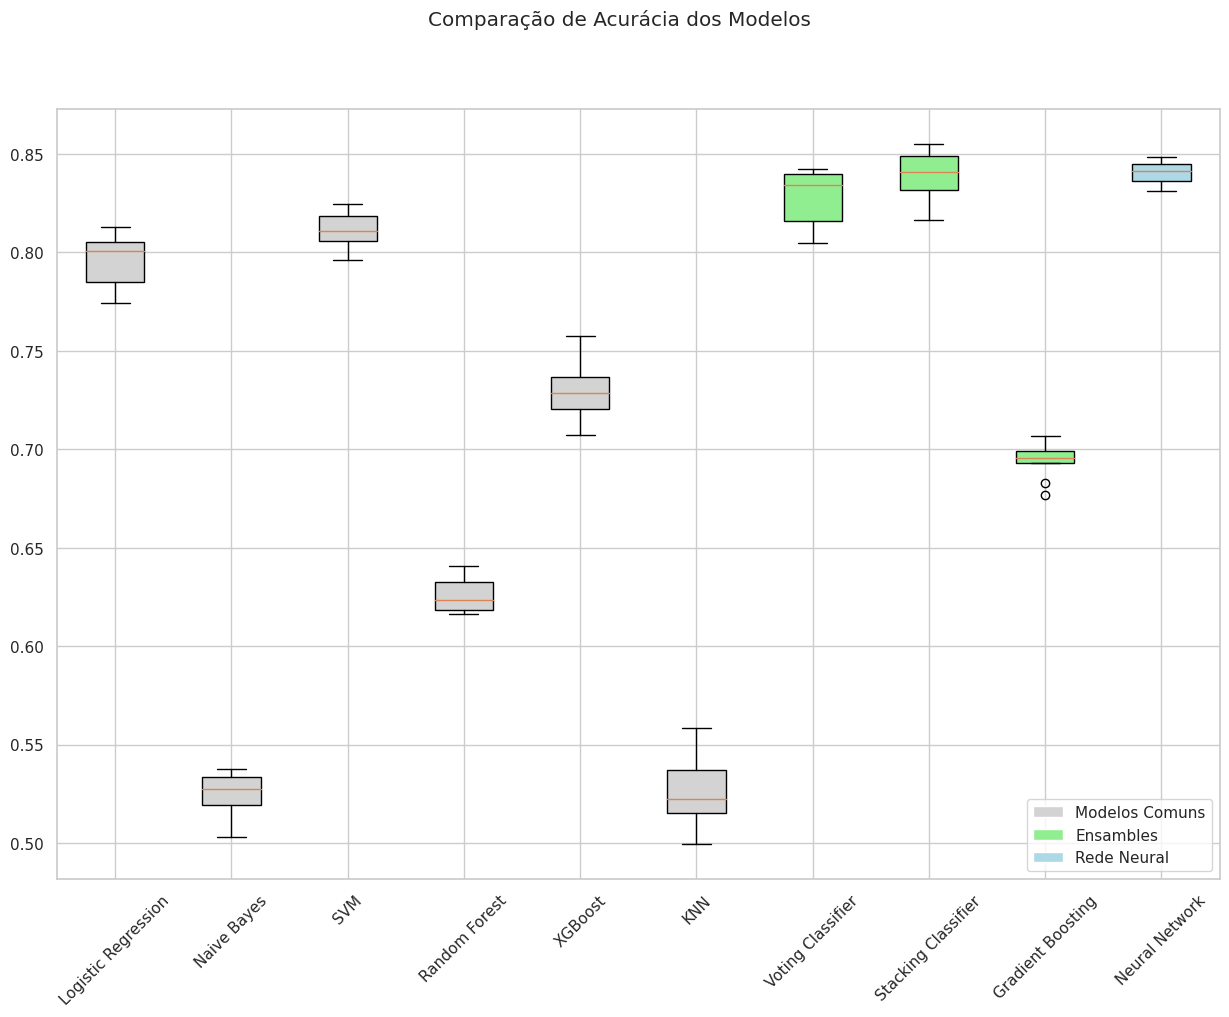

In [81]:
# Encontrar o índice da melhor combinação de hiperparâmetros
best_combination_index = combinacoes.index((
    best_params['dropout'],
    best_params['optimizer'],
    best_params['batch_size'],
    best_params['epochs'],
    best_params['units'],
    best_params['activation']
))

# Cada combinação tem 3 resultados correspondentes, portanto:
start_index = best_combination_index * 3
end_index = start_index + 3

# Extrair os resultados de acurácia para a melhor combinação
nn_accuracies = [max(results[i]['val_accuracy']) for i in range(start_index, end_index)]

# Adicionar essas acurácias à lista de resultados e adicionar o nome ao gráfico
results_ml.append(nn_accuracies)
names.append('Neural Network')

# Agora podemos criar o boxplot incluindo a rede neural
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Comparação de Acurácia dos Modelos')
ax = fig.add_subplot(111)
# Criando boxplots
box = plt.boxplot(results_ml, patch_artist=True)  # 'patch_artist=True' é necessário para preencher as caixas com cor

# Cores para os modelos normais, ensambles e rede neural
normal_color = '#D3D3D3'  # Cinza claro para modelos normais
ensemble_color = '#90EE90'  # Verde claro para ensembles
nn_color = '#ADD8E6'  # Azul claro para rede neural

# Iterar sobre cada boxplot para mudar a cor
for i, patch in enumerate(box['boxes']):
    if names[i] in ['Voting Classifier', 'Stacking Classifier', 'Gradient Boosting']:
        # Mudar a cor para verde se for um ensemble
        patch.set_facecolor(ensemble_color)
    elif names[i] == 'Neural Network':
        # Mudar a cor para azul claro se for a rede neural
        patch.set_facecolor(nn_color)
    else:
        # Manter a cor padrão cinza claro para os outros
        patch.set_facecolor(normal_color)

legend_elements = [
    Patch(facecolor=normal_color, label='Modelos Comuns'),
    Patch(facecolor=ensemble_color, label='Ensambles'),
    Patch(facecolor=nn_color, label='Rede Neural')
]

# Criar a legenda
plt.legend(handles=legend_elements, loc='lower right')

ax.set_xticklabels(names, rotation=45)
plt.show()


A análise do boxplot reforça, gráficamente, os insights anteriores:

- De fato os Ensembles e a Rede Neural se destacam com acurácias mais altas alcançadas e menor dispersão, indicando que de fato esses modelos apresentaram resultados consistentes e, no contexto deste trabalho, satisfatórios até esta análise.

- Alguns modelos individuais, como Naive Bayes e principalmente o KNN, apresentam maior variabilidade e acurácias mais baixas, sugerindo um desempenho menos estável, como já havia sido identificado.

- O Stacking Classifier, em verde, realmente aparenta ter um desempenho ligeiramente melhor em relação à acurácia que a Rede Neural, mostrada em azul, com menos variação nos resultados, sugerindo que, talvez, a abordagem de ensemble pode ser mais eficaz para este problema específico. A Rede Neural, apesar de não ser o modelo mais preciso, ainda mantém um desempenho robusto, destacando-se como uma opção viável com uma ótima balança entre alta acurácia e baixa variação nos resultados.


## 8.4 - Matriz de confusão do SVM e do Stacking Classifier

Assim como fizemos para o modelo de Redes Neurais, vamos plotar as matrizes de confusão dos modelos SVM (em vermelho) e Stacking Classifier (em verde).

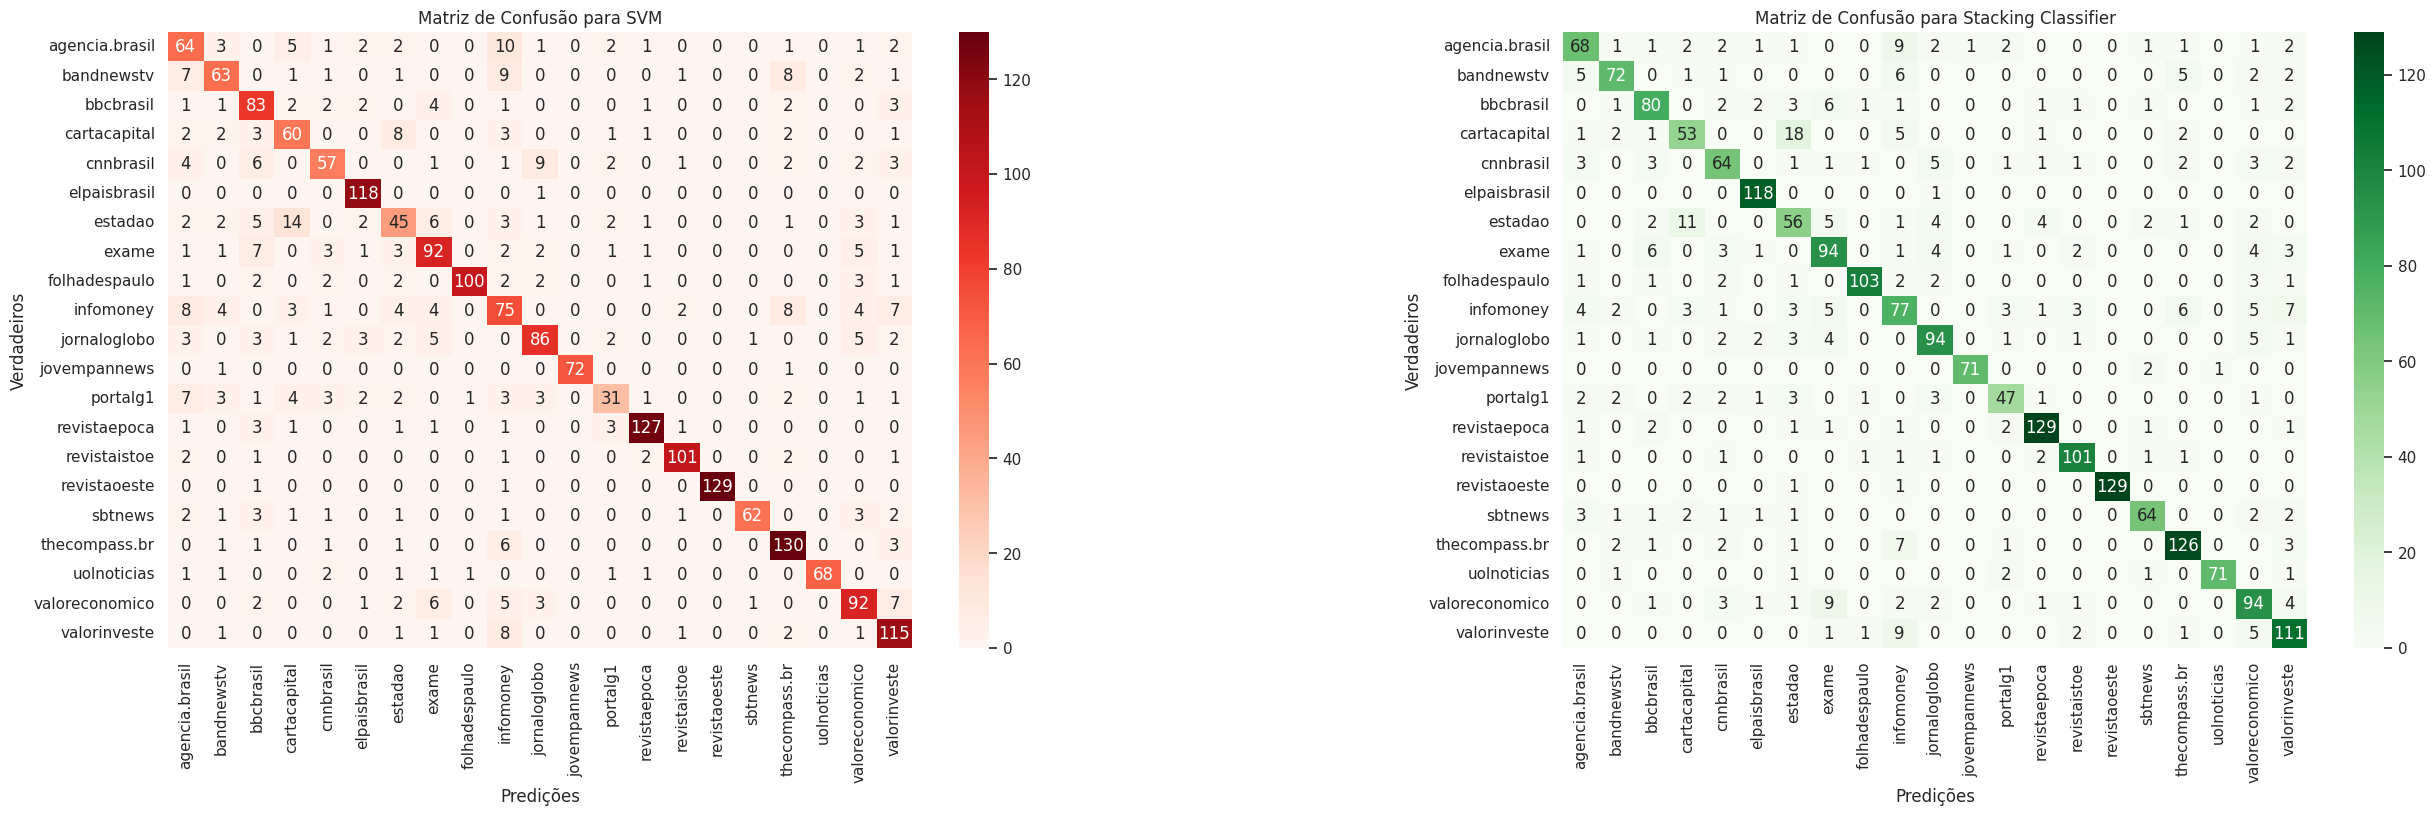

In [82]:
# Lista de modelos a serem avaliados e suas cores correspondentes no gráfico
selected_models = [
    ('SVM', loaded_models['SVM'], 'Reds'),
    ('Stacking Classifier', loaded_models['Stacking Classifier'], 'Greens')
]

# Configuração da plotagem
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for ax, (name, model, cmap) in zip(axes, selected_models):
    # Fazer previsões no conjunto de teste usando o modelo carregado
    y_pred = model.predict(X_test_prepared)

    # Converter as previsões de volta para rótulos de string usando o inverso do label_encoder
    y_pred_labels = label_encoder.inverse_transform(y_pred)

    # Gerar a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred_labels)

    # Plotar a matriz de confusão com a cor especificada
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=ax)
    ax.set_title(f'Matriz de Confusão para {name}')
    ax.set_ylabel('Verdadeiros')
    ax.set_xlabel('Predições')

plt.show()

De imediato, percebemos que, tal como o modelo de Redes Neurais, os modelos avaliados cumpriram bem o seu papel ao classificar corretamente as classes no conjunto de teste, o que é evidenciado pela intensidade das cores na diagonal principal das matrizes.

O Ensemble, como já esperado, parece ter uma performance superior, alcançando a classificação correta na maioria das classes. É muito difícil notar tonalidades de verde fora da diagonal principal, à exceção das 18 notícias da 'cartacapital' classificadas erroneamente como 'estadao'. Este foi um problema também observado na matriz de confusão da Rede Neural, possivelmente explicado pela presença marcante da palavra 'mulher' nas nuvens de palavras de ambas as classes, vistas na seção 7.3.

Curiosamente, o modelo SVM, apesar de exibir algumas dispersões de vermelho fora da diagonal principal, foi o que melhor classificou a classe 'cartacapital' entre os modelos selecionados. Esse fato chama a atenção, considerando que o próprio Stacking Classifier incorpora o SVM. Isso pode indicar nuances nos dados que o Stacking Classifier não captou, ou uma dinâmica única do SVM que se perdeu na combinação com outros modelos no treinamento do Ensemble.

# 9 - Considerações finais

Por fim, ao longo deste trabalho, exploramos principalmente o uso do processamento de linguagem natural para abordar o problema da classificação de fontes de notícias no Instagram.

O modelo de Redes Neurais, construído com uma arquitetura densa, foi pautado sob a hipótese de que a natureza concisa dos textos do Instagram favoreceria uma abordagem menos complexa. De fato, o modelo se mostrou competente e robusto, alcançando resultados promissores de acurácia e evidenciando a força das representações vetoriais, geradas a partir de um modelo Word2Vec treinado com o vocabulário próprio do dataset, em capturar nuances semânticas do idioma. Apesar dos desafios, como o desbalanceamento de classes e o ruído inerente aos dados coletados via webscraping, o modelo foi capaz de oferecer insights interessantes e classificações precisas, graças às etapas de pré-processamento e ao balanceamento durante a validação cruzada através do SMOTE.

Não observamos sinais claros de overfitting, indicativo de que o processo de regularização e o ajuste cuidadoso dos hiperparâmetros foram eficazes. A consistência dos resultados entre os dados de treino, validação e teste também suporta essa conclusão, embora não tenhamos testado um conjunto extensivo de hiperparâmetros para afirmar que não há espaço para um modelo superior ao obtido.

Além disso, o uso de técnicas explicativas, como o LIME, permitiu uma melhor interpretação do modelo, destacando as palavras-chave que influenciavam as previsões e nos permitindo entender melhor suas decisões. Isso abriu caminho para reflexões mais profundas sobre a natureza dos dados e a possibilidade de ajustes e melhorias no pré-processamento, como a remoção de palavras repetitivas e comuns a quase todoas as classes, exemplificada pela palavra "notícia".

Os modelos de ensambles e machine learning tradicionais também foram muito úteis para oferecer perspectivas alternativas e reforçar a importância de confrontar diferentes modelos e estratégias em busca de melhores resultados. Através de comparações diretas, desvendamos as potencialidades e as limitações de cada abordagem, encontrando no Stacking Classifier um forte concorrente à nossa rede neural.

Nas etapas de avaliação de resultados, focamos em entender como os modelos que desenvolvemos se comportaram ao serem confrontados com dados novos, representando o verdadeiro teste de suas capacidades de generalização. Para isso, nos baseamos principalmente na acurácia mas também fizemos ponderações quanto a outras métricas como o recall e F1 Score, escolhidas pela sua relevância em contextos de classificação, onde é crucial não apenas acertar, mas também ser consistente em todas as classes.

A melhor solução encontrada ao final foi o Stacking Classifier, que integrou os modelos SVM, Random Forest e Regressão Logística em uma estrutura unificada, fornecendo a melhor performance geral nos três parâmetros de desempenho monitorados: precisão, recall e F1-Score. Contudo, os valores obtidos não são estatisticamente tão superiores aos obtifos pela Rede Neural, mostrando um equilibrio entre esses dois modelos.



## 9.1 - Teste Interativo

Para demonstrar a aplicabilidade prática dos modelos desenvolvidos, este segmento final do trabalho permite ao leitor testar a capacidade de previsão das fontes de notícias utilizando textos aleatórios retirados do Instagram de uma das 21 fontes. Esta funcionalidade interativa destina-se a mostrar como o models de Rede Neural e o Ensemble Stacking Classifier, lidam com entradas novas e não vistas durante o treinamento e sequer estavam no conjunto de teste.

A função `predict_random_news`, que recebe um texto, um modelo específico, o modelo Word2Vec e o codificador de etiquetas, é responsável por todo o processamento necessário para adaptar o texto ao formato apropriado para a previsão. O leitor pode facilmente substituir o exemplo dado por qualquer outro texto de notícia das 21 fontes monitoradas, mesmo que seja um texto atual e não incluído no dataset total.

Para facilitar o leitor, segue o conjunto total das fontes e seus respectivos links de perfis:

- Infomoney: https://www.instagram.com/infomoney/
- Estadão: https://www.instagram.com/estadao/
- Valor Econômico: https://www.instagram.com/valoreconomico/
- Jornal O Globo: https://www.instagram.com/jornaloglobo/
- CNN Brasil: https://www.instagram.com/cnnbrasil/
- Valor Investe: https://www.instagram.com/valorinveste/
- BBC Brasil: https://www.instagram.com/bbcbrasil/
- Folha de S.Paulo: https://www.instagram.com/folhadespaulo/
- Portal G1: https://www.instagram.com/portalg1/
- UOL Notícias: https://www.instagram.com/uolnoticias/
- Exame: https://www.instagram.com/exame/
- El País Brasil: https://www.instagram.com/elpaisbrasil/
- Revista Oeste: https://www.instagram.com/revistaoeste/
- CartaCapital: https://www.instagram.com/cartacapital/
- Agência Brasil: https://www.instagram.com/agencia.brasil/
- The Compass BR: https://www.instagram.com/thecompass.br/
- SBT News: https://www.instagram.com/sbtnews/
- Jovem Pan News: https://www.instagram.com/jovempannews/
- Revista Época: https://www.instagram.com/revistaepoca/
- Revista IstoÉ: https://www.instagram.com/revistaistoe/
- Band News TV: https://www.instagram.com/bandnewstv/


In [83]:
# Usando uma noticia aleatória do instagram da infomoney como exemplo, fora do dataset para tentar realizar a previsão
news = '''A Alphabet, controladora do Google, registrou no 1º trimestre receitas que superaram as expectativas dos analistas, impulsionadas pelo crescimento de sua unidade de computação em nuvem.

As vendas, excluindo pagamentos a parceiros, ficaram em de US$ 67,6 bilhões, superando os US$ 66,1 bilhões esperados em média pelos analistas. O lucro líquido foi de US$ 1,89 por ação, em comparação com a estimativa de Wall Street de US$ 1,53 por ação. A receita de publicidade em buscas aumentou 14%, foi a US$ 46,2 bilhões, a estimativa média era de US$ 45 bilhões. A empresa, também, disse que pagaria um dividendo de 20 centavos por ação e recompraria mais US$ 70 bilhões em ações. As ações saltaram 14% no after market.

Assim como outras “big techs”, a Alphabet tem investido no desenvolvimento de inteligência artificial, uma estratégia que ajudou a impulsionar a procura pelos seus serviços na nuvem, que registaram um aumento de 28% nas receitas no 1º trimestre.

Os investidores mostraram que estão entusiasmados com as perspectivas da IA, mas querem que as empresas de tecnologia continuem a se concentrar nas receitas e nos lucros.
'''

print(news)
print('\nResultado do Modelo de Redes Neurais:\n')
predict_random_news(news, best_model, best_word2vec, label_encoder)
print('\nResultado do Ensamble Stacking Classifier:\n')
predict_random_news(news, loaded_models['Stacking Classifier'], best_word2vec, label_encoder)

A Alphabet, controladora do Google, registrou no 1º trimestre receitas que superaram as expectativas dos analistas, impulsionadas pelo crescimento de sua unidade de computação em nuvem.

As vendas, excluindo pagamentos a parceiros, ficaram em de US$ 67,6 bilhões, superando os US$ 66,1 bilhões esperados em média pelos analistas. O lucro líquido foi de US$ 1,89 por ação, em comparação com a estimativa de Wall Street de US$ 1,53 por ação. A receita de publicidade em buscas aumentou 14%, foi a US$ 46,2 bilhões, a estimativa média era de US$ 45 bilhões. A empresa, também, disse que pagaria um dividendo de 20 centavos por ação e recompraria mais US$ 70 bilhões em ações. As ações saltaram 14% no after market.

Assim como outras “big techs”, a Alphabet tem investido no desenvolvimento de inteligência artificial, uma estratégia que ajudou a impulsionar a procura pelos seus serviços na nuvem, que registaram um aumento de 28% nas receitas no 1º trimestre.

Os investidores mostraram que estão entu